<a href="https://colab.research.google.com/github/hussain0048/Projects-/blob/master/Predict_IPL_Winner_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1- Introductoin** [1]
In this article, I will take you through how we can predict the IPL winner with machine learning. The Indian Premier League (IPL) is a professional Twenty20 cricket league in India, played in March or April and May of each year by eight teams representing eight different cities in India. New Section

#**2-How We Can Predict IPL Winner with Machine Learning?**

This is not a simple task, it’s one of the complex tasks of Machine Learning to predict the winner of a cricket tournament. The worst thing is that it doesn’t matter how much the accuracy rate you get in the process, but sometimes it cannot be predicted by just looking at the data as the sentiments and form or players matters a lot.[1]

So how we can predict the IPL winner with machine learning? We can predict the winner by using the data. The process that I followed to predict the IPL winner 2020 is explained below:

- Given the player’s stats in a machine learning model, the model generates the rating points for that player based on their stats.
- Once the model has generated scores for all IPL players, we choose a team’s best playing XI using an algorithm and add all the points of the best XI players to get the total team score.
- This algorithm then generates the winner of two teams using the team evaluation points out that the machine learning algorithm predicted.
- We call this algorithm for all league stadium games. So after the league stage, the algorithm produces the top four teams that qualify.
- In the qualifying phase, again, the same algorithm is executed between two teams and the top two teams will be selected for the finals.
- In the final phase, we end up with the two best teams. We call the algorithm one last time and it comes out the final winner.

#**3- Import Libarary**

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from collections import Counter 
import itertools
import statistics
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
import scipy.stats as st

#**4- Exploratory Data Analysis**

##**4.1- Batting Data**
I retrieved the data for the top 100 players from ICC T20 by using the Beautiful Soup package and got the data for batsmen, bowlers and all-rounders separately. You can download the full dataset [here](https://github.com/amankharwal/Website-data/blob/master/IPL.rar)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Batsmen_data=pd.read_csv("/content/drive/My Drive/Datasets/IPL Winer/Batsmen_Data.csv")
Batsmen_data.shape

(117, 11)

### Drop the Matches_Bat feature as it is not an important feature

In [ ]:
Batsmen_data.drop(['Matches_Bat'],axis=1,inplace=True)
Batsmen_data.head()

### Get the unique values of Double_Centuries_Bat

In [ ]:
Batsmen_data['Double_Centuries_Bat'].unique()

### We have only 0 values in Double Centuries column. So, it is not a valid feature. We can drop this feature

In [ ]:
Batsmen_data.drop(['Double_Centuries_Bat'],axis=1,inplace=True)
Batsmen_data.head()

In [ ]:
Batsmen_data['Centuries_Bat'].value_counts()

### We can see that almost 81% of the players didn't score a century. So we can drop this feature as it does not provide any value

In [ ]:
Batsmen_data.drop(['Centuries_Bat'],axis=1,inplace=True)
Batsmen_data

In [ ]:
Batsmen_data

##**4.2- Bowling Data**

In [ ]:
Bowler_data=pd.read_csv("/content/drive/My Drive/Datasets/IPL Winer/Bowling_Data.csv")
Bowler_data.head()

### Drop the Matches_Bowl feature as it is not an important feature

In [11]:
Bowler_data.drop(['Matches_Bowl'],axis=1,inplace=True)
Bowler_data.head()

,Bowler_Rating,Innings_Bowl,Wickets_Bowl,Economy_Bowl,Bowling_Average_Bowl,Bowling_Strike_Rate_Bowl,FiveWickets_Bowl,TenWickets_Bowl
0,736,48,89,6.14,12.63,12.34,2,0
1,730,19,25,6.15,17.72,17.28,0,0
2,713,29,33,6.13,19.03,18.64,0,0
3,712,24,25,6.73,21.28,18.96,1,0
4,681,22,17,7.45,35.06,28.24,0,0


### Get the unique values of TenWickets_Bowl

In [ ]:
Bowler_data['TenWickets_Bowl'].unique()

### We have only 0's in TenWickets_Bowl. So, it is not a valid feature. We can drop this feature

In [ ]:
Bowler_data.drop(['TenWickets_Bowl'],axis=1,inplace=True)
Bowler_data.head()

In [ ]:
Bowler_data['FiveWickets_Bowl'].value_counts()

In [ ]:
Bowler_data.drop(['FiveWickets_Bowl'],axis=1,inplace=True)
Bowler_data.head()

###**4.2.1-AllRounder Data**

In [ ]:
AllRounder_data=pd.read_csv("/content/drive/My Drive/Datasets/IPL Winer/Allrounder_Data.csv")
AllRounder_data

### Drop the Matches_As_Bat_AllRounder feature as it is not an important feature

In [19]:
AllRounder_data.drop(['Matches_As_Bat_AllRounder'],axis=1,inplace=True)
AllRounder_data.head()

,Allrounder_Rating,Innings_Bat_AllRounder,Runs_Scored_AllRounder,Batting_Average_AllRounder,Batting_Strike_Rate_AllRounder,Centuries_AllRounder,Double_Centuries_AllRounder,Fifties_AllRounder,Fours_AllRounder,Sixes_AllRounder,Innings_As_Bowl_Allrounder,Wickets_AllRounder,Economy_AllRounder,Bowling_Average_AllRounder,Bowling_Strike_Rate_AllRounder,FiveWickets_AllRounder,TenWickets_AllRounder
0,213,40,844,24.11,129.85,0,0,8,78,26,39,32,7.21,29.28,24.38,0,0
1,204,54,1576,35.02,160.00,3,0,9,135,81,40,26,7.49,27.08,21.69,0,0
2,170,21,436,24.22,150.34,0,0,4,40,20,20,19,7.41,24.58,19.89,0,0
3,159,31,601,20.72,99.67,0,0,4,68,14,30,35,6.48,16.86,15.60,0,0
4,153,29,621,27.00,112.30,0,0,6,47,15,15,21,6.38,13.76,12.95,0,0


### Get the unique values of Double_Centuries_AllRounder

In [20]:
AllRounder_data['Double_Centuries_AllRounder'].unique()

array([0])

### We have only 0's in Double_Centuries_AllRounder. So, it is not a valid feature. We can drop this feature

In [ ]:
AllRounder_data.drop(['Double_Centuries_AllRounder'],axis=1,inplace=True)
AllRounder_data.head()

In [22]:
AllRounder_data['Centuries_AllRounder'].value_counts()

0    96
3     2
4     1
1     1
Name: Centuries_AllRounder, dtype: int64

### We can see that almost 87% of the players didn't score a century. So we can drop this feature as it does not provide any value

In [23]:
AllRounder_data.drop(['Centuries_AllRounder'],axis=1,inplace=True)
AllRounder_data.head()

,Allrounder_Rating,Innings_Bat_AllRounder,Runs_Scored_AllRounder,Batting_Average_AllRounder,Batting_Strike_Rate_AllRounder,Fifties_AllRounder,Fours_AllRounder,Sixes_AllRounder,Innings_As_Bowl_Allrounder,Wickets_AllRounder,Economy_AllRounder,Bowling_Average_AllRounder,Bowling_Strike_Rate_AllRounder,FiveWickets_AllRounder,TenWickets_AllRounder
0,213,40,844,24.11,129.85,8,78,26,39,32,7.21,29.28,24.38,0,0
1,204,54,1576,35.02,160.00,9,135,81,40,26,7.49,27.08,21.69,0,0
2,170,21,436,24.22,150.34,4,40,20,20,19,7.41,24.58,19.89,0,0
3,159,31,601,20.72,99.67,4,68,14,30,35,6.48,16.86,15.60,0,0
4,153,29,621,27.00,112.30,6,47,15,15,21,6.38,13.76,12.95,0,0


### Get the unique values of TenWickets_AllRounder

In [ ]:
AllRounder_data['TenWickets_AllRounder'].unique()

### We have only 0's in TenWickets_AllRounder. So, it is not a valid feature. We can drop this feature

In [25]:
AllRounder_data.drop(['TenWickets_AllRounder'],axis=1,inplace=True)
AllRounder_data.head()

,Allrounder_Rating,Innings_Bat_AllRounder,Runs_Scored_AllRounder,Batting_Average_AllRounder,Batting_Strike_Rate_AllRounder,Fifties_AllRounder,Fours_AllRounder,Sixes_AllRounder,Innings_As_Bowl_Allrounder,Wickets_AllRounder,Economy_AllRounder,Bowling_Average_AllRounder,Bowling_Strike_Rate_AllRounder,FiveWickets_AllRounder
0,213,40,844,24.11,129.85,8,78,26,39,32,7.21,29.28,24.38,0
1,204,54,1576,35.02,160.00,9,135,81,40,26,7.49,27.08,21.69,0
2,170,21,436,24.22,150.34,4,40,20,20,19,7.41,24.58,19.89,0
3,159,31,601,20.72,99.67,4,68,14,30,35,6.48,16.86,15.60,0
4,153,29,621,27.00,112.30,6,47,15,15,21,6.38,13.76,12.95,0


### Get the unique values of FiveWickets_AllRounder

In [26]:
AllRounder_data['FiveWickets_AllRounder'].unique()

array([0, 1, 2])

In [27]:
AllRounder_data['FiveWickets_AllRounder'].value_counts()

0    90
1     9
2     1
Name: FiveWickets_AllRounder, dtype: int64

### We can see that almost 91% of the players didn't score a Half Century. So we can drop this feature as it does not provide any value

In [28]:
AllRounder_data.drop(['FiveWickets_AllRounder'],axis=1,inplace=True)
AllRounder_data

,Allrounder_Rating,Innings_Bat_AllRounder,Runs_Scored_AllRounder,Batting_Average_AllRounder,Batting_Strike_Rate_AllRounder,Fifties_AllRounder,Fours_AllRounder,Sixes_AllRounder,Innings_As_Bowl_Allrounder,Wickets_AllRounder,Economy_AllRounder,Bowling_Average_AllRounder,Bowling_Strike_Rate_AllRounder
0,213,40,844,24.11,129.85,8,78,26,39,32,7.21,29.28,24.38
1,204,54,1576,35.02,160.00,9,135,81,40,26,7.49,27.08,21.69
2,170,21,436,24.22,150.34,4,40,20,20,19,7.41,24.58,19.89
3,159,31,601,20.72,99.67,4,68,14,30,35,6.48,16.86,15.60
4,153,29,621,27.00,112.30,6,47,15,15,21,6.38,13.76,12.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,160,23,173,12.36,101.76,2,9,5,49,39,7.10,29.54,24.95
96,150,10,67,9.57,113.56,2,7,3,11,11,6.80,21.64,19.09
97,408,75,1567,23.74,123.87,11,165,33,75,92,6.81,20.58,18.12
98,150,13,183,20.33,105.78,2,12,5,12,5,7.38,32.00,26.00


### Delete the rows which have 0 values

In [29]:
Batsmen_data=Batsmen_data[Batsmen_data['Fifties_Bat'] !=0]
Batsmen_data

,Batsmen_Rating,Innings_Bat,Runs_Scored_Bat,Batting_Average_Bat,Batting_Strike_Rate_Bat,Fifties_Bat,Fours_Bat,Sixes_Bat
0,879,38,1471,50.72,128.14,13,146,21
3,280,11,238,21.64,136.00,2,24,10
4,584,58,1665,32.65,125.00,11,170,36
5,721,54,1576,35.02,160.00,7,133,81
8,429,29,621,27.00,112.30,4,45,15
...,...,...,...,...,...,...,...,...
112,641,85,2536,32.51,134.61,15,226,119
113,687,86,2138,30.99,137.49,13,160,105
114,407,88,1992,25.22,116.63,11,208,52
115,509,89,1672,21.16,136.05,3,137,76


In [30]:
AllRounder_data=AllRounder_data[AllRounder_data['Fifties_AllRounder'] !=0]
AllRounder_data=AllRounder_data[AllRounder_data['Fours_AllRounder'] !=0]

##**5- Visualize the Data**

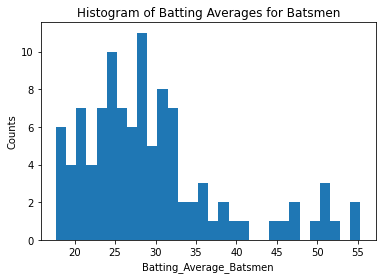

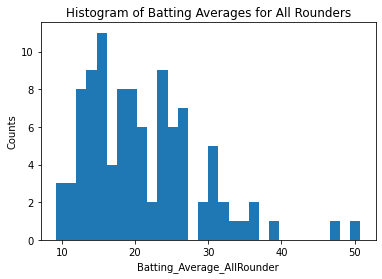

In [31]:
plt.hist(Batsmen_data['Batting_Average_Bat'],density=False, bins=30, label="Data")
plt.xlabel("Batting_Average_Batsmen")
plt.title("Histogram of Batting Averages for Batsmen")
plt.ylabel("Counts")
plt.show()

plt.hist(AllRounder_data['Batting_Average_AllRounder'],density=False, bins=30, label="Data")
plt.xlabel("Batting_Average_AllRounder")
plt.ylabel("Counts")
plt.title("Histogram of Batting Averages for All Rounders")
plt.show()

Observation: Batting Averages for Batsmen and AllRounders are Right Skewed

In [ ]:
plt.hist(Batsmen_data['Runs_Scored_Bat'],density=False, bins=30, label="Data")
plt.xlabel("Runs_Scored_Bat")
plt.ylabel("Counts")
plt.title("Histogram of Runs Scored for Batsmen")
plt.show()

plt.hist(AllRounder_data['Runs_Scored_AllRounder'],density=False, bins=40, label="Data")
plt.xlabel("Runs_Scored_AllRounder")
plt.ylabel("Counts")
plt.title("Histogram of Runs Scored for AllRounder")
plt.show()

Observation: Runs Scored for Batsmen and AllRounders are Right Skewed

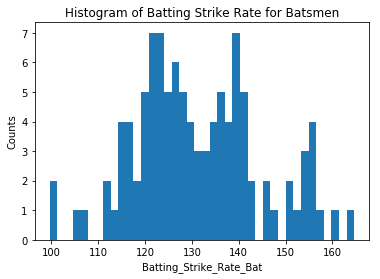

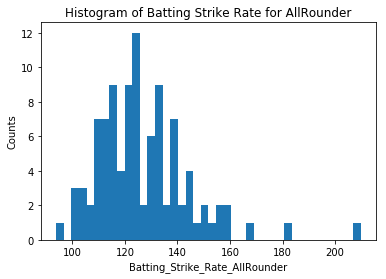

In [ ]:
plt.hist(Batsmen_data['Batting_Strike_Rate_Bat'],density=False, bins=40, label="Data")
plt.xlabel("Batting_Strike_Rate_Bat")
plt.ylabel("Counts")
plt.title("Histogram of Batting Strike Rate for Batsmen")
plt.show()

plt.hist(AllRounder_data['Batting_Strike_Rate_AllRounder'],density=False, bins=40, label="Data")
plt.xlabel("Batting_Strike_Rate_AllRounder")
plt.ylabel("Counts")
plt.title("Histogram of Batting Strike Rate for AllRounder")
plt.show()

Observation: Batting Strike rate for Batsmen and AllRounders are approximately normally distributed

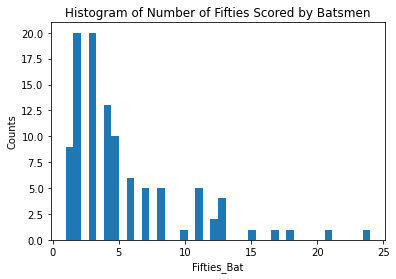

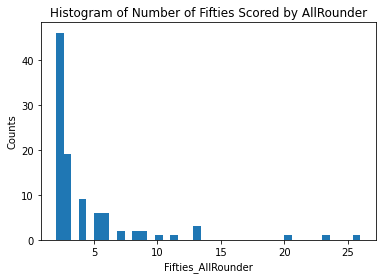

In [33]:
plt.hist(Batsmen_data['Fifties_Bat'],density=False, bins=40, label="Data")
plt.xlabel("Fifties_Bat")
plt.ylabel("Counts")
plt.title("Histogram of Number of Fifties Scored by Batsmen")
plt.show()

plt.hist(AllRounder_data['Fifties_AllRounder'],density=False, bins=40, label="Data")
plt.xlabel("Fifties_AllRounder")
plt.ylabel("Counts")
plt.title("Histogram of Number of Fifties Scored by AllRounder")
plt.show()

Observation: Number of Fifties Scored by Batsmen and AllRounders are Right Skewed

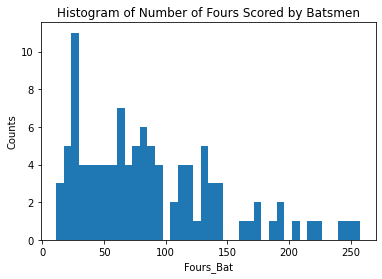

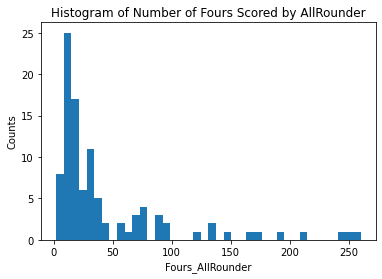

In [34]:
plt.hist(Batsmen_data['Fours_Bat'],density=False, bins=40, label="Data")
plt.xlabel("Fours_Bat")
plt.ylabel("Counts")
plt.title("Histogram of Number of Fours Scored by Batsmen")
plt.show()

plt.hist(AllRounder_data['Fours_AllRounder'],density=False, bins=40, label="Data")
plt.xlabel("Fours_AllRounder")
plt.ylabel("Counts")
plt.title("Histogram of Number of Fours Scored by AllRounder")
plt.show()

Observation: Number of Fours Scored by Batsmen and AllRounders are Right Skewed

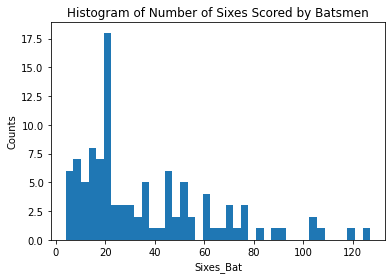

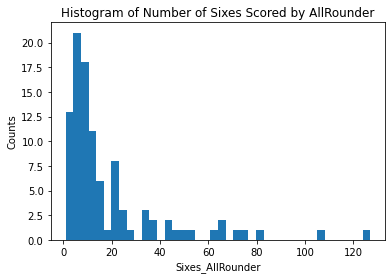

In [35]:
plt.hist(Batsmen_data['Sixes_Bat'],density=False, bins=40, label="Data")
plt.xlabel("Sixes_Bat")
plt.ylabel("Counts")
plt.title("Histogram of Number of Sixes Scored by Batsmen")
plt.show()

plt.hist(AllRounder_data['Sixes_AllRounder'],density=False, bins=40, label="Data")
plt.xlabel("Sixes_AllRounder")
plt.ylabel("Counts")
plt.title("Histogram of Number of Sixes Scored by AllRounder")
plt.show()

Observation: Number of Sixes Scored by Batsmen and AllRounders are Right Skewed

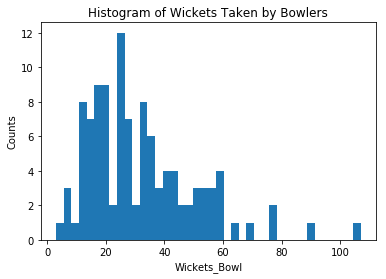

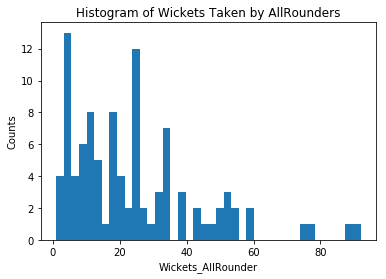

In [ ]:
plt.hist(Bowler_data['Wickets_Bowl'],density=False, bins=40, label="Data")
plt.xlabel("Wickets_Bowl")
plt.ylabel("Counts")
plt.title("Histogram of Wickets Taken by Bowlers")
plt.show()

plt.hist(AllRounder_data['Wickets_AllRounder'],density=False, bins=40, label="Data")
plt.xlabel("Wickets_AllRounder")
plt.ylabel("Counts")
plt.title("Histogram of Wickets Taken by AllRounders")
plt.show()

Observation: Number of Wickets Taken by Bowlers and AllRounders are Right Skewed

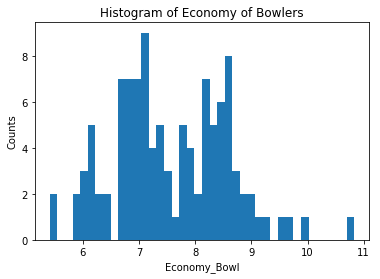

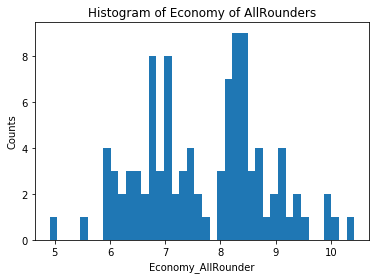

In [ ]:
plt.hist(Bowler_data['Economy_Bowl'],density=False, bins=40, label="Data")
plt.xlabel("Economy_Bowl")
plt.ylabel("Counts")
plt.title("Histogram of Economy of Bowlers")
plt.show()

plt.hist(AllRounder_data['Economy_AllRounder'],density=False, bins=40, label="Data")
plt.xlabel("Economy_AllRounder")
plt.ylabel("Counts")
plt.title("Histogram of Economy of AllRounders")
plt.show()

Observation: Economy of Bowlers and AllRounders are approximately normally distributed

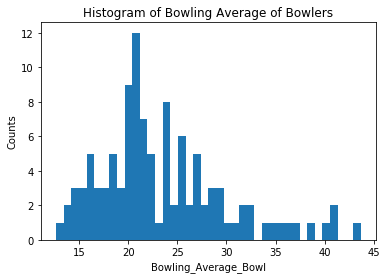

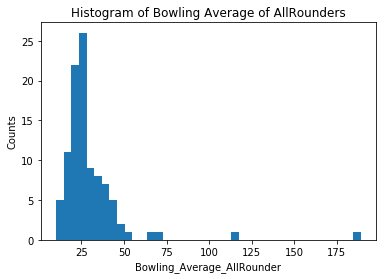

In [ ]:
plt.hist(Bowler_data['Bowling_Average_Bowl'],density=False, bins=40, label="Data")
plt.xlabel("Bowling_Average_Bowl")
plt.ylabel("Counts")
plt.title("Histogram of Bowling Average of Bowlers")
plt.show()

plt.hist(AllRounder_data['Bowling_Average_AllRounder'],density=False, bins=40, label="Data")
plt.xlabel("Bowling_Average_AllRounder")
plt.ylabel("Counts")
plt.title("Histogram of Bowling Average of AllRounders")
plt.show()

Observation: Bowling Average of Bowlers is approximately normally distributed whereas the Bowling Average of AllRounders is Right Skewed

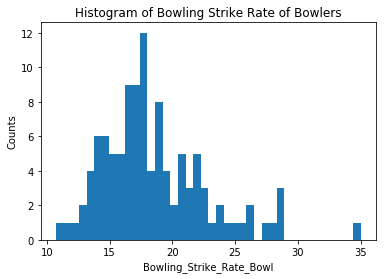

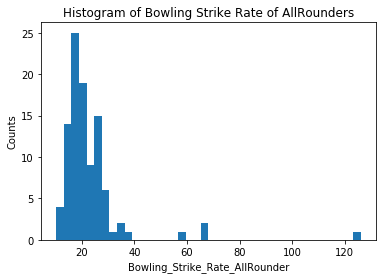

In [ ]:
plt.hist(Bowler_data['Bowling_Strike_Rate_Bowl'],density=False, bins=40, label="Data")
plt.xlabel("Bowling_Strike_Rate_Bowl")
plt.ylabel("Counts")
plt.title("Histogram of Bowling Strike Rate of Bowlers")
plt.show()

plt.hist(AllRounder_data['Bowling_Strike_Rate_AllRounder'],density=False, bins=40, label="Data")
plt.xlabel("Bowling_Strike_Rate_AllRounder")
plt.ylabel("Counts")
plt.title("Histogram of Bowling Strike Rate of AllRounders")
plt.show()

Observation: Bowling Strike Rate of Bowlers is approximately normally distributed whereas the Bowling Average of AllRounders is Right Skewed

### We have skewness in the data and the models are not working properly. So, lets apply log transformation

#### Using Log Transformation

In [36]:
x = Batsmen_data.values
x_log = np.log(x)
df_log = pd.DataFrame(x_log)
df_log.columns=["a","b","c","d","e","f","g","h"]

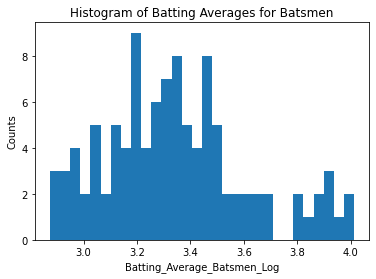

In [37]:
plt.hist(df_log["d"],density=False, bins=30, label="Data")
plt.xlabel("Batting_Average_Batsmen_Log")
plt.title("Histogram of Batting Averages for Batsmen")
plt.ylabel("Counts")
plt.show()

In [38]:
bat_avg_Batsmen=Batsmen_data['Batting_Average_Bat']
print("Skewness with Original Data:",bat_avg_Batsmen.skew())
bat_avg_Batsmen_log=df_log['d']
print("Skewness with LogTransformed Data:",bat_avg_Batsmen_log.skew())

Skewness with Original Data: 1.2361652222314674
Skewness with LogTransformed Data: 0.5901060919379084


### Skewness was greately reduced using Log Transformation. So apply Log Transformtaion to our data before building the models

In [39]:
Batsmen_data.to_csv("/content/drive/My Drive/Datasets/IPL Winer/Batsmen_Data_After_Processing.csv",index = False)
Bowler_data.to_csv("/content/drive/My Drive/Datasets/IPL Winer/Bowler_Data_After_Processing.csv",index=False)
AllRounder_data.to_csv("/content/drive/My Drive/Datasets/IPL Winer/AllRounder_Data_After_Processing.csv",index=False)

## Models:

In [40]:
def sklearnSGDRegressor(Xtrn,ytrn,Xcv,ycv,epochs):
    iters=epochs
    rmse_train_SGD=[]
    rmse_cv_SGD=[]

    SGDReg_sklearn_train_table=PrettyTable()
    SGDReg_sklearn_train_table.field_names = ["Epochs","Train Error"]
    SGDReg_sklearn_cv_table=PrettyTable()
    SGDReg_sklearn_cv_table.field_names = ["Epochs","CV Error"]

    best_epoch_train_SGD_sklearn=0
    best_rmse_train_SGD_sklearn=float('inf')

    best_epoch_cv_SGD_sklearn=0
    best_rmse_cv_SGD_sklearn=float('inf')

    for i in iters:
        sgd_reg_train = SGDRegressor(shuffle = False,max_iter = i)
        sgd_reg_train.fit(Xtrn, ytrn)
        y_pred_trn_sgd_sklearn = sgd_reg_train.predict(Xtrn)
        y_pred_cv_sgd_sklearn = sgd_reg_train.predict(Xcv)
        rmse_train_SGD.append(math.sqrt(mean_squared_error(ytrn,y_pred_trn_sgd_sklearn)))
        rmse_cv_SGD.append(math.sqrt(mean_squared_error(ycv,y_pred_cv_sgd_sklearn)))
        SGDReg_sklearn_train_table.add_row([i,math.sqrt(mean_squared_error(ytrn,y_pred_trn_sgd_sklearn))])
        SGDReg_sklearn_cv_table.add_row([i,math.sqrt(mean_squared_error(ycv,y_pred_cv_sgd_sklearn))])
        if(math.sqrt(mean_squared_error(ytrn,y_pred_trn_sgd_sklearn))<best_rmse_train_SGD_sklearn):
            best_epoch_train_SGD_sklearn=i
            best_rmse_train_SGD_sklearn=math.sqrt(mean_squared_error(ytrn,y_pred_trn_sgd_sklearn))
        if(math.sqrt(mean_squared_error(ycv,y_pred_cv_sgd_sklearn))<best_rmse_cv_SGD_sklearn):
            best_epoch_cv_SGD_sklearn=i
            best_rmse_cv_SGD_sklearn=math.sqrt(mean_squared_error(ycv,y_pred_cv_sgd_sklearn))
        
    plt.plot(iters,rmse_train_SGD,label="Train RMSE")
    plt.plot(iters,rmse_cv_SGD,label="CV RMSE")
    plt.title("RMSE with epochs")
    plt.xlabel("epochs: Hyperparameter")
    plt.ylabel("RMSE")
    plt.legend()
    plt.show()

    print(SGDReg_sklearn_train_table)
    print(SGDReg_sklearn_cv_table)
    print("Best No.of Epochs is:",best_epoch_cv_SGD_sklearn)
    return best_epoch_cv_SGD_sklearn

In [41]:
def SGDRegressionOwn(train_data,learning_rate,total_iter,k):
    num_iter=1
    weights=np.zeros(shape=(1,train_data.shape[1]-1))
    intercept=0
    while(num_iter<=total_iter):
        sample_data=train_data.sample(k,replace=True)
        y=np.array(sample_data['regresult'])
        x=np.array(sample_data.drop('regresult',axis=1))
        w_gradient=np.zeros(shape=(1,train_data.shape[1]-1))
        b_gradient=0
        for i in range(k):
            error=y[i]-np.dot(weights,x[i])-intercept
            w_gradient=w_gradient+(-2)*x[i]*error
            b_gradient=b_gradient+(-2)*(error)
        weights=weights-learning_rate*(w_gradient/k)
        intercept=intercept-learning_rate*(b_gradient/k)
        num_iter+=1
    
    return weights,intercept

In [43]:
def predictSGDOwn(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)

In [44]:
def SGDRegressionOwnTraining(Xtrn,ytrn,Xcv,ycv,epochs):
    iters=[10,100,200,400,800,1600,2000]
    rmse_train_SGD_Own=[]
    rmse_cv_SGD_Own=[]
    
    train_data=pd.DataFrame(Xtrn)
    train_data['regresult']=ytrn
    
    SGDReg_own_train_table=PrettyTable()
    SGDReg_own_train_table.field_names = ["Epochs","Train Error"]
    
    SGDReg_own_cv_table=PrettyTable()
    SGDReg_own_cv_table.field_names = ["Epochs","CV Error"]

    best_epoch_train_SGD_Own=0
    best_rmse_train_SGD_Own=float('inf')

    best_epoch_cv_SGD_Own=0
    best_rmse_cv_SGD_Own=float('inf')

    for i in iters:
        w,b = SGDRegressionOwn(train_data,learning_rate=0.01,total_iter=i,k=10)
        y_pred_trn_sgd_own = predictSGDOwn(Xtrn,w,b)
        y_pred_cv_sgd_own = predictSGDOwn(Xcv,w,b)
        rmse_train_SGD_Own.append(math.sqrt(mean_squared_error(ytrn,y_pred_trn_sgd_own)))
        rmse_cv_SGD_Own.append(math.sqrt(mean_squared_error(ycv,y_pred_cv_sgd_own)))
        SGDReg_own_train_table.add_row([i,math.sqrt(mean_squared_error(ytrn,y_pred_trn_sgd_own))])
        SGDReg_own_cv_table.add_row([i,math.sqrt(mean_squared_error(ycv,y_pred_cv_sgd_own))])
        if(math.sqrt(mean_squared_error(ytrn,y_pred_trn_sgd_own))<best_rmse_train_SGD_Own):
            best_epoch_train_SGD_Own=i
            best_rmse_train_SGD_Own=math.sqrt(mean_squared_error(ytrn,y_pred_trn_sgd_own))
        if(math.sqrt(mean_squared_error(ycv,y_pred_cv_sgd_own))<best_rmse_cv_SGD_Own):
            best_epoch_cv_SGD_Own=i
            best_rmse_cv_SGD_Own=math.sqrt(mean_squared_error(ycv,y_pred_cv_sgd_own))
    plt.plot(epochs,rmse_train_SGD_Own,label="Train RMSE")
    plt.plot(epochs,rmse_cv_SGD_Own,label="CV RMSE")
    plt.title("RMSE with epochs")
    plt.xlabel("epochs: Hyperparameter")
    plt.ylabel("RMSE")
    plt.legend()
    plt.show()
    print(SGDReg_own_train_table)
    print(SGDReg_own_cv_table)

    print("Best No.of Epochs is:",best_epoch_cv_SGD_Own)
    return best_epoch_cv_SGD_Own

In [45]:
def LinearRegressionLSM(Xtrn,ytrn,shape):
    Xtrn=np.concatenate([np.ones((Xtrn.shape[0],1),dtype=Xtrn.dtype),Xtrn], axis=1)
    transpose=Xtrn.transpose()
    prod=np.matmul(transpose,Xtrn)
    prod = prod+0.00001*np.random.rand(shape, shape)
    inverse = np.linalg.inv(prod)
    ytrn=ytrn.reshape(-1,1)
    we=np.matmul(inverse,transpose)
    we=we.dot(ytrn)
    return we

In [46]:
def predict_LSM(x,we):
    x=np.concatenate([np.ones((x.shape[0],1),dtype=x.dtype),x], axis=1)
    yhat=x.dot(we)
    return yhat

In [47]:
def sklearnKNNRegressor(Xtrn,ytrn,Xcv,ycv,neighbors):
    no_of_neighbors=neighbors
    rmse_train_KNN=[]
    rmse_cv_KNN=[]

    KNNReg_sklearn_train_table=PrettyTable()
    KNNReg_sklearn_train_table.field_names = ["Neighbors","Train Error"]

    KNNReg_sklearn_cv_table=PrettyTable()
    KNNReg_sklearn_cv_table.field_names = ["Neighbors","CV Error"]

    best_neighbors_train_KNN_sklearn=0
    best_rmse_train_KNN_sklearn=float('inf')

    best_neighbors_cv_KNN_sklearn=0
    best_rmse_cv_KNN_sklearn=float('inf')

    for i in no_of_neighbors:
        knn_reg_train = KNeighborsRegressor(n_neighbors=i)
        knn_reg_train.fit(Xtrn, ytrn)
        y_pred_trn_KNN_sklearn = knn_reg_train.predict(Xtrn)
        y_pred_cv_KNN_sklearn = knn_reg_train.predict(Xcv)
        rmse_train_KNN.append(math.sqrt(mean_squared_error(ytrn,y_pred_trn_KNN_sklearn)))
        rmse_cv_KNN.append(math.sqrt(mean_squared_error(ycv,y_pred_cv_KNN_sklearn)))
        KNNReg_sklearn_train_table.add_row([i,math.sqrt(mean_squared_error(ytrn,y_pred_trn_KNN_sklearn))])
        KNNReg_sklearn_cv_table.add_row([i,math.sqrt(mean_squared_error(ycv,y_pred_cv_KNN_sklearn))])
        if(math.sqrt(mean_squared_error(ytrn,y_pred_trn_KNN_sklearn))<best_rmse_train_KNN_sklearn):
            best_neighbors_train_KNN_sklearn=i
            best_rmse_train_KNN_sklearn=math.sqrt(mean_squared_error(ytrn,y_pred_trn_KNN_sklearn))
        if(math.sqrt(mean_squared_error(ycv,y_pred_cv_KNN_sklearn))<best_rmse_cv_KNN_sklearn):
            best_neighbors_cv_KNN_sklearn=i
            best_rmse_cv_KNN_sklearn=math.sqrt(mean_squared_error(ycv,y_pred_cv_KNN_sklearn))
    plt.plot(no_of_neighbors,rmse_train_KNN,label="Train RMSE")
    plt.plot(no_of_neighbors,rmse_cv_KNN,label="CV RMSE")
    plt.title("RMSE with Neighbors")
    plt.xlabel("Neighbors: Hyperparameter")
    plt.ylabel("RMSE")
    plt.legend()
    plt.show()
    print(KNNReg_sklearn_train_table)
    print(KNNReg_sklearn_cv_table)
    print("Best No.of Neighbors is:",best_neighbors_cv_KNN_sklearn)
    return best_neighbors_cv_KNN_sklearn

In [48]:
def euclidean_dist(x,xq):
    sum_dist=0
    dist=0
    for i in range(len(x)):
        sum_dist+=pow((x[i]-xq[i]),2)
        dist=math.sqrt(sum_dist)
    return dist

In [49]:
def KNNRegressionOwn(Xtrn,ytrn,n_neighbors,xq):
    nearest_points_indeces=[]
    distances={}
    sorted_distances={}
    Yhat=[]
    Ytrue=[]
    n=0
    for i in range(xq.shape[0]):
        for j in range(Xtrn.shape[0]):
            distances[j]=euclidean_dist(xq[i],Xtrn[j])
        sorted_distances=sorted(distances.items(), key=lambda x: x[1])
        near_points = dict(itertools.islice(dict(sorted_distances).items(), n_neighbors)) 
        for k in near_points:
            nearest_points_indeces.append(k)
        for p in range(len(nearest_points_indeces)):
            Ytrue.append(ytrn[nearest_points_indeces[p]])
        Yhat.append(sum(Ytrue)/len(Ytrue))
        nearest_points_indeces=[]
        distances={}
        Ytrue=[]
    return Yhat


In [50]:
def KNNRegressorOwnTraining(Xtrn,ytrn,Xcv,ycv,neighbors):
    no_of_neighbors=neighbors
    rmse_train_KNN_Own=[]
    rmse_cv_KNN_Own=[]

    KNNReg_own_train_table=PrettyTable()
    KNNReg_own_train_table.field_names = ["Neighbors","Train Error"]

    KNNReg_own_cv_table=PrettyTable()
    KNNReg_own_cv_table.field_names = ["Neighbors","CV Error"]

    best_neighbors_train_KNN_own=0
    best_rmse_train_KNN_own=float('inf')

    best_neighbors_cv_KNN_own=0
    best_rmse_cv_KNN_own=float('inf')

    for i in neighbors:
        y_pred_trn_knn_own = KNNRegressionOwn(Xtrn,ytrn,i,Xtrn)
        y_pred_cv_knn_own = KNNRegressionOwn(Xtrn,ytrn,i,Xcv)
 
        rmse_train_KNN_Own.append(math.sqrt(mean_squared_error(ytrn,y_pred_trn_knn_own)))
        rmse_cv_KNN_Own.append(math.sqrt(mean_squared_error(ycv,y_pred_cv_knn_own)))

        KNNReg_own_train_table.add_row([i,math.sqrt(mean_squared_error(ytrn,y_pred_trn_knn_own))])
        KNNReg_own_cv_table.add_row([i,math.sqrt(mean_squared_error(ycv,y_pred_cv_knn_own))])
    
        if(math.sqrt(mean_squared_error(ytrn,y_pred_trn_knn_own))<best_rmse_train_KNN_own):
            best_neighbors_train_KNN_own=i
            best_rmse_train_KNN_own=math.sqrt(mean_squared_error(ytrn,y_pred_trn_knn_own))
        if(math.sqrt(mean_squared_error(ycv,y_pred_cv_knn_own))<best_rmse_cv_KNN_own):
            best_neighbors_cv_KNN_own=i
            best_rmse_cv_KNN_own=math.sqrt(mean_squared_error(ycv,y_pred_cv_knn_own))
    plt.plot(neighbors,rmse_train_KNN_Own,label="Train RMSE")
    plt.plot(neighbors,rmse_cv_KNN_Own,label="CV RMSE")
    plt.title("RMSE with Neighbors")
    plt.xlabel("Neighbors: Hyperparameter")
    plt.ylabel("RMSE")
    plt.legend()
    plt.show()
    print(KNNReg_own_train_table)
    print(KNNReg_own_cv_table)
    print("Best No.of Neighbors is:",best_neighbors_cv_KNN_own)
    return best_neighbors_cv_KNN_own

In [51]:
def KNNRegressionOwnWeighted(Xtrn,ytrn,n_neighbors,xq):
    nearest_points_indeces=[]
    distances={}
    sorted_distances={}
    Yhat=[]
    Ytrue=[]
    weights=[]
    sum_weights=0
    pred=0
    n=0
    for i in range(xq.shape[0]):
        for j in range(Xtrn.shape[0]):
            distances[j]=euclidean_dist(xq[i],Xtrn[j])
        sorted_distances=sorted(distances.items(), key=lambda x: x[1])
        near_points = dict(itertools.islice(dict(sorted_distances).items(), n_neighbors)) 
        for k,v in near_points.items():
            nearest_points_indeces.append(k)
            weights.append(1/((v*v)+0.0001))
        for p in range(len(nearest_points_indeces)):
            Ytrue.append(ytrn[nearest_points_indeces[p]])
        for s in range(len(Ytrue)):
            pred+=Ytrue[s]*weights[s]
        sum_weights=sum(weights)    
        Yhat.append(pred/sum_weights)
        nearest_points_indeces=[]
        distances={}
        Ytrue=[]
        weights=[]
        sum_weights=0
        pred=0
    return Yhat


In [52]:
def KNNRegressionOwnWeightedTraining(Xtrn,ytrn,Xcv,ycv,neighbors):
    no_of_neighbors=neighbors
    rmse_train_KNN_Weighted_Own=[]
    rmse_cv_KNN_Weighted_Own=[]

    KNN_Weighted_own_train_table=PrettyTable()
    KNN_Weighted_own_train_table.field_names = ["Neighbors","Train Error"]

    KNN_Weighted_own_cv_table=PrettyTable()
    KNN_Weighted_own_cv_table.field_names = ["Neighbors","CV Error"]

    best_neighbors_train_KNN_Weighted_own=0
    best_neighbors_cv_KNN_Weighted_own=0

    best_rmse_train_KNN_Weighted_own=float('inf')
    best_rmse_cv_KNN_Weighted_own=float('inf')

    for i in no_of_neighbors:
        y_pred_trn_knn_weighted_own = KNNRegressionOwnWeighted(Xtrn,ytrn,i,Xtrn)
        y_pred_cv_knn_weighted_own = KNNRegressionOwnWeighted(Xtrn,ytrn,i,Xcv)
 
        rmse_train_KNN_Weighted_Own.append(math.sqrt(mean_squared_error(ytrn,y_pred_trn_knn_weighted_own)))
        rmse_cv_KNN_Weighted_Own.append(math.sqrt(mean_squared_error(ycv,y_pred_cv_knn_weighted_own)))
    
        KNN_Weighted_own_train_table.add_row([i,math.sqrt(mean_squared_error(ytrn,y_pred_trn_knn_weighted_own))])
        KNN_Weighted_own_cv_table.add_row([i,math.sqrt(mean_squared_error(ycv,y_pred_cv_knn_weighted_own))])
    
        if(math.sqrt(mean_squared_error(ytrn,y_pred_trn_knn_weighted_own))<best_rmse_train_KNN_Weighted_own):
            best_neighbors_train_KNN_Weighted_own=i
            best_rmse_train_KNN_Weighted_own=math.sqrt(mean_squared_error(ytrn,y_pred_trn_knn_weighted_own))
        if(math.sqrt(mean_squared_error(ycv,y_pred_cv_knn_weighted_own))<best_rmse_cv_KNN_Weighted_own):
            best_neighbors_cv_KNN_Weighted_own=i
            best_rmse_cv_KNN_Weighted_own=math.sqrt(mean_squared_error(ycv,y_pred_cv_knn_weighted_own))

    plt.plot(neighbors,rmse_train_KNN_Weighted_Own,label="Train RMSE")
    plt.plot(neighbors,rmse_cv_KNN_Weighted_Own,label="CV RMSE")
    plt.title("RMSE with Neighbors")
    plt.xlabel("Neighbors: Hyperparameter")
    plt.ylabel("RMSE")
    plt.legend()
    plt.show()
    print(KNN_Weighted_own_train_table)
    print(KNN_Weighted_own_cv_table)
    print("Best No.of Neighbors is:",best_neighbors_cv_KNN_Weighted_own)
    return best_neighbors_cv_KNN_Weighted_own

### Executing the above defined models by passing data to them

### Batsmen Data

In [54]:
from sklearn.utils import resample

M_trn = np.genfromtxt('/content/drive/My Drive/Datasets/IPL Winer/Batsmen_Data_After_Processing.csv', missing_values=0, skip_header=1, delimiter=',', dtype=float)

ytrn_Bat = M_trn[:, 0]
Xtrn_Bat = M_trn[:, 1:8]

Xtrn_Bat, Xtst_Bat, ytrn_Bat, ytst_Bat = train_test_split(Xtrn_Bat, ytrn_Bat, test_size=0.1)
Xtrn_Bat, Xcv_Bat, ytrn_Bat, ycv_Bat = train_test_split(Xtrn_Bat, ytrn_Bat, test_size=0.1) 
 

print("Shape of Xtrn_Bat is",Xtrn_Bat.shape)
print("Shape of ytrn_Bat is",ytrn_Bat.shape)
print("Shape of Xcv_Bat is",Xcv_Bat.shape)
print("Shape of ycv_Bat is",ycv_Bat.shape)
print("Shape of Xtst_Bat is",Xtst_Bat.shape)
print("Shape of ytst_Bat is",ytst_Bat.shape)

#Using the Data without sampling for KNN as KNN is sensitive to duplicates

Xtrn_Bat_KNN=Xtrn_Bat
Xcv_Bat_KNN=Xcv_Bat
Xtst_Bat_KNN=Xtst_Bat
ytrn_Bat_KNN=ytrn_Bat
ycv_Bat_KNN=ycv_Bat
ytst_Bat_KNN=ytst_Bat

Shape of Xtrn_Bat is (84, 7)
Shape of ytrn_Bat is (84,)
Shape of Xcv_Bat is (10, 7)
Shape of ycv_Bat is (10,)
Shape of Xtst_Bat is (11, 7)
Shape of ytst_Bat is (11,)


### Sampling the Train Data separately to make sure that there is no data leake to the Test set with Replacement to generate samples as the datasize is small.

In [55]:
Xtrndf=pd.DataFrame(Xtrn_Bat)
ytrndf=pd.DataFrame(ytrn_Bat)
Train_Data = pd.concat([ytrndf,Xtrndf], axis=1)
Train_Data_upsampled = resample(Train_Data,replace=True,n_samples=50)
Xtrn_Bat_upsampled=Train_Data_upsampled.iloc[:,1:8].values
Ytrn_Bat_upsampled=Train_Data_upsampled.iloc[:,0].values
Xtrnfinal=np.concatenate((Xtrn_Bat, Xtrn_Bat_upsampled), axis=0)
ytrnfinal=np.concatenate((ytrn_Bat, Ytrn_Bat_upsampled), axis=0)

### Sampling the CV Data

In [56]:
Xcvdf=pd.DataFrame(Xcv_Bat)
ycvdf=pd.DataFrame(ycv_Bat)
CV_Data = pd.concat([ycvdf,Xcvdf], axis=1)
CV_Data_upsampled = resample(CV_Data,replace=True,n_samples=30)
Xcv_Bat_upsampled=CV_Data_upsampled.iloc[:,1:8].values
Ycv_Bat_upsampled=CV_Data_upsampled.iloc[:,0].values
Xcvfinal=np.concatenate((Xcv_Bat, Xcv_Bat_upsampled), axis=0)
ycvfinal=np.concatenate((ycv_Bat, Ycv_Bat_upsampled), axis=0)

### Sampling the Test Data

In [57]:
Xtestdf=pd.DataFrame(Xtst_Bat)
ytestdf=pd.DataFrame(ytst_Bat)
Test_Data = pd.concat([ytestdf,Xtestdf], axis=1)
Test_Data_upsampled = resample(Test_Data,replace=True,n_samples=15)
Xtest_Bat_upsampled=Test_Data_upsampled.iloc[:,1:8].values
Ytest_Bat_upsampled=Test_Data_upsampled.iloc[:,0].values
Xtestfinal=np.concatenate((Xtst_Bat, Xtest_Bat_upsampled), axis=0)
ytestfinal=np.concatenate((ytst_Bat, Ytest_Bat_upsampled), axis=0)

### Applying the Log to the Data to make it as normal distribution and then standardizing it

In [58]:
Xtrn_Bat=Xtrnfinal
Xcv_Bat=Xcvfinal
Xtst_Bat=Xtestfinal
ytrn_Bat=ytrnfinal
ycv_Bat=ycvfinal
ytst_Bat=ytestfinal

print("Shape of Xtrn_Bat after upsampling is",Xtrn_Bat.shape)
print("Shape of ytrn_Bat after upsampling is",ytrn_Bat.shape)
print("Shape of Xcv_Bat after upsampling is",Xcv_Bat.shape)
print("Shape of ycv_Bat after upsampling is",ycv_Bat.shape)
print("Shape of Xtst_Bat after upsampling is",Xtst_Bat.shape)
print("Shape of ytst_Bat after upsampling is",ytst_Bat.shape)


Xtrn_Bat = np.log(Xtrn_Bat)
Xcv_Bat = np.log(Xcv_Bat)
Xtst_Bat = np.log(Xtst_Bat)

Stdscaler_Bat = preprocessing.StandardScaler().fit(Xtrn_Bat)
Xtrn_Bat = Stdscaler_Bat.transform(Xtrn_Bat)
Xcv_Bat = Stdscaler_Bat.transform(Xcv_Bat)
Xtst_Bat = Stdscaler_Bat.transform(Xtst_Bat)

Shape of Xtrn_Bat after upsampling is (134, 7)
Shape of ytrn_Bat after upsampling is (134,)
Shape of Xcv_Bat after upsampling is (40, 7)
Shape of ycv_Bat after upsampling is (40,)
Shape of Xtst_Bat after upsampling is (26, 7)
Shape of ytst_Bat after upsampling is (26,)


### SGD SKlearn

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linea

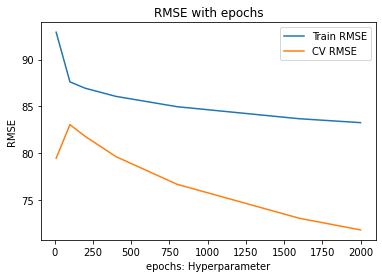

+--------+-------------------+
| Epochs |    Train Error    |
+--------+-------------------+
|   10   | 92.93324891109789 |
|  100   | 87.61790319078486 |
|  200   | 86.93546861259397 |
|  400   | 86.06594551914787 |
|  800   | 84.95943114790497 |
|  1600  | 83.66827534330612 |
|  2000  | 83.25084050547436 |
+--------+-------------------+
+--------+-------------------+
| Epochs |      CV Error     |
+--------+-------------------+
|   10   | 79.43675443359818 |
|  100   |  83.0395308685332 |
|  200   | 81.77847479454815 |
|  400   | 79.61651515835915 |
|  800   |  76.6502946779505 |
|  1600  | 73.00820140532751 |
|  2000  | 71.75980267815822 |
+--------+-------------------+
Best No.of Epochs is: 2000
+--------+-------------------+
| Epochs |     Test Error    |
+--------+-------------------+
|  2000  | 84.14330310769975 |
+--------+-------------------+


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


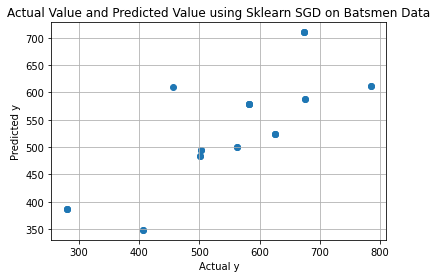

In [59]:
epochs=[10,100,200,400,800,1600,2000]
best_epoch_cv_SGD_sklearn_Bat=sklearnSGDRegressor(Xtrn_Bat,ytrn_Bat,Xcv_Bat,ycv_Bat,epochs)

rmse_test_SGD_Bat=[]
SGDReg_sklearn_test_table_Bat=PrettyTable()
SGDReg_sklearn_test_table_Bat.field_names = ["Epochs","Test Error"]

sgd_reg_test_Bat = SGDRegressor(shuffle = False,max_iter = best_epoch_cv_SGD_sklearn_Bat)
sgd_reg_test_Bat.fit(Xtrn_Bat, ytrn_Bat)
y_pred_tst_sgd_sklearn_Bat = sgd_reg_test_Bat.predict(Xtst_Bat)
rmse_test_SGD_Bat.append(math.sqrt(mean_squared_error(ytst_Bat,y_pred_tst_sgd_sklearn_Bat)))
SGDReg_sklearn_test_table_Bat.add_row([best_epoch_cv_SGD_sklearn_Bat,math.sqrt(mean_squared_error(ytst_Bat,y_pred_tst_sgd_sklearn_Bat))])
print(SGDReg_sklearn_test_table_Bat)

plt.scatter(ytst_Bat,y_pred_tst_sgd_sklearn_Bat)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual Value and Predicted Value using Sklearn SGD on Batsmen Data')
plt.show()

### SGD Own

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packa

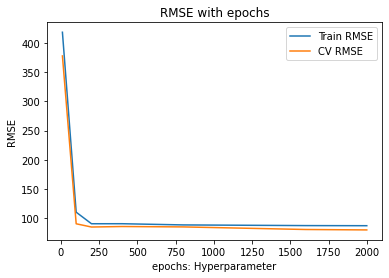

+--------+--------------------+
| Epochs |    Train Error     |
+--------+--------------------+
|   10   | 418.7044575789971  |
|  100   | 109.90862598319873 |
|  200   | 90.08124501548662  |
|  400   | 90.12779645168501  |
|  800   | 88.06227358425113  |
|  1600  | 86.91314596657894  |
|  2000  | 86.72318279709167  |
+--------+--------------------+
+--------+--------------------+
| Epochs |      CV Error      |
+--------+--------------------+
|   10   | 378.02436264160445 |
|  100   |  90.0168911060751  |
|  200   |  84.4628271304684  |
|  400   | 85.33285354450403  |
|  800   | 84.64563355321236  |
|  1600  | 80.21219249072708  |
|  2000  |  79.493698896445   |
+--------+--------------------+
Best No.of Epochs is: 2000
+--------+-------------------+
| Epochs |     Test Error    |
+--------+-------------------+
|  2000  | 87.97115422465019 |
+--------+-------------------+


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  after removing the cwd from sys.path.


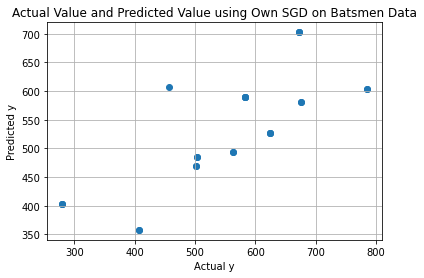

In [60]:
train_data_Bat=pd.DataFrame(Xtrn_Bat)
train_data_Bat['regresult']=ytrn_Bat
epochs=[10,100,200,400,800,1600,2000]

rmse_test_SGD_Own_Bat=[]
SGDReg_own_test_table_Bat=PrettyTable()
SGDReg_own_test_table_Bat.field_names = ["Epochs","Test Error"]

best_epoch_cv_SGD_Own_Bat=SGDRegressionOwnTraining(Xtrn_Bat,ytrn_Bat,Xcv_Bat,ycv_Bat,epochs)

w_Bat,b_Bat = SGDRegressionOwn(train_data_Bat,learning_rate=0.01,total_iter=best_epoch_cv_SGD_Own_Bat,k=10)
y_pred_tst_sgd_own_Bat = predictSGDOwn(Xtst_Bat,w_Bat,b_Bat)
rmse_test_SGD_Own_Bat.append(math.sqrt(mean_squared_error(ytst_Bat,y_pred_tst_sgd_own_Bat)))
SGDReg_own_test_table_Bat.add_row([best_epoch_cv_SGD_Own_Bat,math.sqrt(mean_squared_error(ytst_Bat,y_pred_tst_sgd_own_Bat))])
print(SGDReg_own_test_table_Bat)

plt.scatter(ytst_Bat,y_pred_tst_sgd_own_Bat)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual Value and Predicted Value using Own SGD on Batsmen Data')
plt.show()

### LSE Own

RMSE using Least Squares Estimates is 76.32633519707727


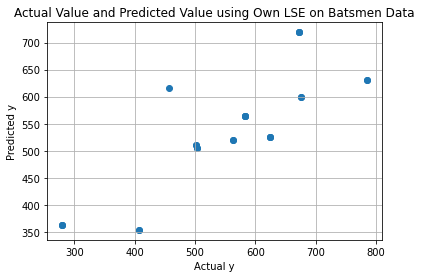

In [61]:
shape=Xtrn_Bat.shape[1]+1
we_Bat=LinearRegressionLSM(Xtrn_Bat,ytrn_Bat,shape)
y_pred_lse_own_Bat=predict_LSM(Xtst_Bat,we_Bat)
rmse_train_LSE_Own_Bat=math.sqrt(mean_squared_error(ytst_Bat,y_pred_lse_own_Bat))
print("RMSE using Least Squares Estimates is",rmse_train_LSE_Own_Bat)


plt.scatter(ytst_Bat,y_pred_lse_own_Bat)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual Value and Predicted Value using Own LSE on Batsmen Data')
plt.show()

### KNN Sklearn

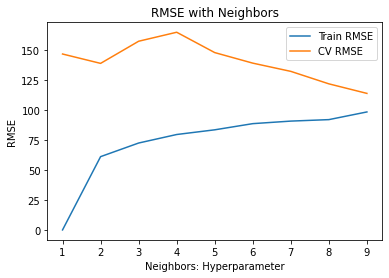

+-----------+-------------------+
| Neighbors |    Train Error    |
+-----------+-------------------+
|     1     |        0.0        |
|     2     | 61.05849556738506 |
|     3     | 72.41111135467433 |
|     4     | 79.50707515686891 |
|     5     | 83.41826053374758 |
|     6     |  88.5616882124975 |
|     7     | 90.68308558745565 |
|     8     | 91.91671388635837 |
|     9     | 98.31460602468759 |
+-----------+-------------------+
+-----------+--------------------+
| Neighbors |      CV Error      |
+-----------+--------------------+
|     1     | 146.59467930317254 |
|     2     | 138.78706712082362 |
|     3     | 157.23517418186046 |
|     4     | 164.7331174961489  |
|     5     | 147.77780618211926 |
|     6     | 138.98530098139474 |
|     7     | 132.1248018553145  |
|     8     | 121.73414937888218 |
|     9     | 113.77332890607697 |
+-----------+--------------------+
Best No.of Neighbors is: 9
+-----------+-------------------+
| Neighbors |     Test Error    |
+-------

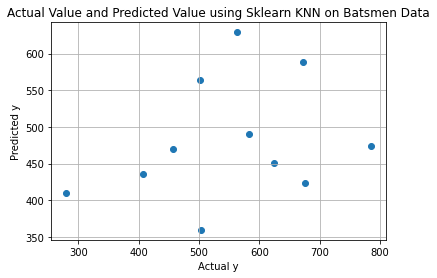

In [62]:
rmse_test_KNN_Bat=[]
KNNReg_sklearn_test_table_Bat=PrettyTable()
KNNReg_sklearn_test_table_Bat.field_names = ["Neighbors","Test Error"]
neighbors=[1,2,3,4,5,6,7,8,9]
best_neighbors_cv_KNN_sklearn_Bat=sklearnKNNRegressor(Xtrn_Bat_KNN,ytrn_Bat_KNN,Xcv_Bat_KNN,ycv_Bat_KNN,neighbors)

knn_reg_test_Bat = KNeighborsRegressor(n_neighbors=best_neighbors_cv_KNN_sklearn_Bat)
knn_reg_test_Bat.fit(Xtrn_Bat_KNN, ytrn_Bat_KNN)
y_pred_tst_knn_sklearn_Bat = knn_reg_test_Bat.predict(Xtst_Bat_KNN)
rmse_test_KNN_Bat.append(math.sqrt(mean_squared_error(ytst_Bat_KNN,y_pred_tst_knn_sklearn_Bat)))
KNNReg_sklearn_test_table_Bat.add_row([best_neighbors_cv_KNN_sklearn_Bat,math.sqrt(mean_squared_error(ytst_Bat_KNN,y_pred_tst_knn_sklearn_Bat))])
print(KNNReg_sklearn_test_table_Bat)
plt.scatter(ytst_Bat_KNN,y_pred_tst_knn_sklearn_Bat)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual Value and Predicted Value using Sklearn KNN on Batsmen Data')
plt.show()

### KNN Own

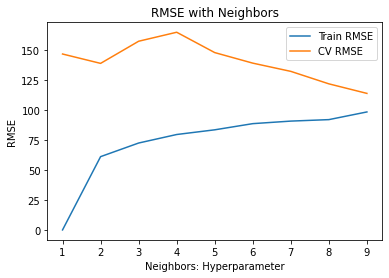

+-----------+-------------------+
| Neighbors |    Train Error    |
+-----------+-------------------+
|     1     |        0.0        |
|     2     | 61.05849556738506 |
|     3     | 72.41111135467433 |
|     4     | 79.50707515686891 |
|     5     | 83.41826053374758 |
|     6     |  88.5616882124975 |
|     7     | 90.68308558745565 |
|     8     | 91.91671388635837 |
|     9     | 98.31460602468759 |
+-----------+-------------------+
+-----------+--------------------+
| Neighbors |      CV Error      |
+-----------+--------------------+
|     1     | 146.59467930317254 |
|     2     | 138.78706712082362 |
|     3     | 157.23517418186046 |
|     4     | 164.7331174961489  |
|     5     | 147.77780618211926 |
|     6     | 138.98530098139474 |
|     7     | 132.1248018553145  |
|     8     | 121.73414937888218 |
|     9     | 113.77332890607697 |
+-----------+--------------------+
Best No.of Neighbors is: 9
+-----------+-------------------+
| Neighbors |     Test Error    |
+-------

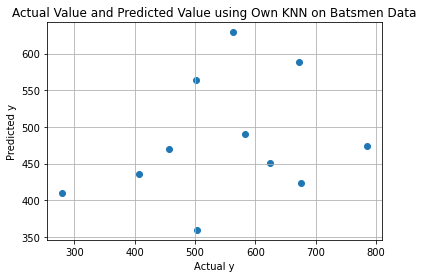

In [63]:
neighbors=[1,2,3,4,5,6,7,8,9]
KNNReg_own_test_table_Bat=PrettyTable()
KNNReg_own_test_table_Bat.field_names = ["Neighbors","Test Error"]

best_neighbors_cv_KNN_own_Bat=KNNRegressorOwnTraining(Xtrn_Bat_KNN,ytrn_Bat_KNN,Xcv_Bat_KNN,ycv_Bat_KNN,neighbors)

y_pred_knn_own_Bat=KNNRegressionOwn(Xtrn_Bat_KNN,ytrn_Bat_KNN,best_neighbors_cv_KNN_own_Bat,Xtst_Bat_KNN)
KNNReg_own_test_table_Bat.add_row([best_neighbors_cv_KNN_own_Bat,math.sqrt(mean_squared_error(ytst_Bat_KNN,y_pred_knn_own_Bat))])
print(KNNReg_own_test_table_Bat)

plt.scatter(ytst_Bat_KNN,y_pred_knn_own_Bat)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual Value and Predicted Value using Own KNN on Batsmen Data')
plt.show()

### Weighted KNN Own

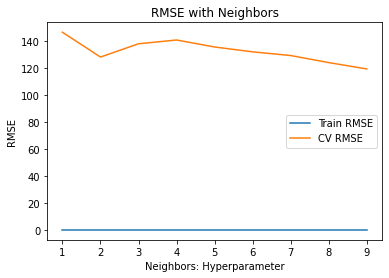

+-----------+------------------------+
| Neighbors |      Train Error       |
+-----------+------------------------+
|     1     |          0.0           |
|     2     | 2.088095057744267e-05  |
|     3     | 3.262091368806536e-05  |
|     4     | 3.738092544633018e-05  |
|     5     | 3.912260669198891e-05  |
|     6     | 4.116334710826104e-05  |
|     7     | 4.354986171710556e-05  |
|     8     |  4.52820408591846e-05  |
|     9     | 4.6690880332156654e-05 |
+-----------+------------------------+
+-----------+--------------------+
| Neighbors |      CV Error      |
+-----------+--------------------+
|     1     | 146.59467930317254 |
|     2     | 128.20530025777256 |
|     3     | 138.02527234583792 |
|     4     | 140.84652968231848 |
|     5     | 135.65559498662083 |
|     6     | 132.06129207674684 |
|     7     | 129.31961417204937 |
|     8     | 124.08333070646069 |
|     9     | 119.38156484137613 |
+-----------+--------------------+
Best No.of Neighbors is: 9
+----------

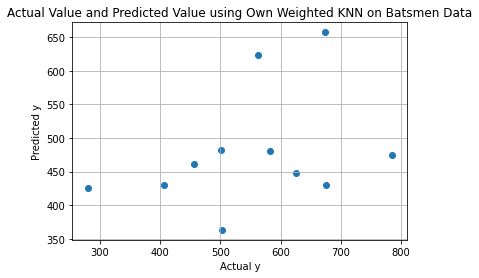

In [64]:
neighbors=[1,2,3,4,5,6,7,8,9]
KNNReg_own_weighted_test_table_Bat=PrettyTable()
KNNReg_own_weighted_test_table_Bat.field_names = ["Neighbors","Test Error"]

best_neighbors_cv_KNN_Weighted_own_Bat=KNNRegressionOwnWeightedTraining(Xtrn_Bat_KNN,ytrn_Bat_KNN,Xcv_Bat_KNN,ycv_Bat_KNN,neighbors)

y_pred_knn_own_weighted_Bat=KNNRegressionOwnWeighted(Xtrn_Bat_KNN,ytrn_Bat_KNN,best_neighbors_cv_KNN_Weighted_own_Bat,Xtst_Bat_KNN)
KNNReg_own_weighted_test_table_Bat.add_row([best_neighbors_cv_KNN_Weighted_own_Bat,math.sqrt(mean_squared_error(ytst_Bat_KNN,y_pred_knn_own_weighted_Bat))])
print(KNNReg_own_test_table_Bat)

plt.scatter(ytst_Bat_KNN,y_pred_knn_own_weighted_Bat)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual Value and Predicted Value using Own Weighted KNN on Batsmen Data')
plt.show()

### Bowler Data

In [66]:
M_trn = np.genfromtxt('/content/drive/My Drive/Datasets/IPL Winer/Bowler_Data_After_Processing.csv', missing_values=0, skip_header=1, delimiter=',', dtype=float)
ytrn_Bowl = M_trn[:, 0]
Xtrn_Bowl = M_trn[:, 1:6]

Xtrn_Bowl, Xtst_Bowl, ytrn_Bowl, ytst_Bowl = train_test_split(Xtrn_Bowl, ytrn_Bowl, test_size=0.2)
Xtrn_Bowl, Xcv_Bowl, ytrn_Bowl, ycv_Bowl = train_test_split(Xtrn_Bowl, ytrn_Bowl, test_size=0.1) 

print("Shape of Xtrn_Bowl is",Xtrn_Bowl.shape)
print("Shape of ytrn_Bowl is",ytrn_Bowl.shape)
print("Shape of Xcv_Bowl is",Xcv_Bowl.shape)
print("Shape of ycv_Bowl is",ycv_Bowl.shape)
print("Shape of Xtst_Bowl is",Xtst_Bowl.shape)
print("Shape of ytst_Bowl is",ytst_Bowl.shape)

#Using the Data without sampling for KNN as KNN is sensitive to duplicates

Xtrn_Bowl_KNN=Xtrn_Bowl
Xcv_Bowl_KNN=Xcv_Bowl
Xtst_Bowl_KNN=Xtst_Bowl
ytrn_Bowl_KNN=ytrn_Bowl
ycv_Bowl_KNN=ycv_Bowl
ytst_Bowl_KNN=ytst_Bowl

Shape of Xtrn_Bowl is (78, 5)
Shape of ytrn_Bowl is (78,)
Shape of Xcv_Bowl is (9, 5)
Shape of ycv_Bowl is (9,)
Shape of Xtst_Bowl is (22, 5)
Shape of ytst_Bowl is (22,)


### Sampling the Train Data separately to make sure that there is no data leake to the Test set with Replacement to generate samples as the datasize is small.

In [67]:
Xtrndf=pd.DataFrame(Xtrn_Bowl)
ytrndf=pd.DataFrame(ytrn_Bowl)
Train_Data = pd.concat([ytrndf,Xtrndf], axis=1)
Train_Data_upsampled = resample(Train_Data,replace=True,n_samples=70)
Xtrn_Bowl_upsampled=Train_Data_upsampled.iloc[:,1:6].values
Ytrn_Bowl_upsampled=Train_Data_upsampled.iloc[:,0].values
Xtrnfinal=np.concatenate((Xtrn_Bowl, Xtrn_Bowl_upsampled), axis=0)
ytrnfinal=np.concatenate((ytrn_Bowl, Ytrn_Bowl_upsampled), axis=0)

### Sampling the CV Data

In [68]:
Xcvdf=pd.DataFrame(Xcv_Bowl)
ycvdf=pd.DataFrame(ycv_Bowl)
CV_Data = pd.concat([ycvdf,Xcvdf], axis=1)
CV_Data_upsampled = resample(CV_Data,replace=True,n_samples=50)
Xcv_Bowl_upsampled=CV_Data_upsampled.iloc[:,1:6].values
Ycv_Bowl_upsampled=CV_Data_upsampled.iloc[:,0].values
Xcvfinal=np.concatenate((Xcv_Bowl, Xcv_Bowl_upsampled), axis=0)
ycvfinal=np.concatenate((ycv_Bowl, Ycv_Bowl_upsampled), axis=0)

### Sampling the Test Data

In [69]:
Xtestdf=pd.DataFrame(Xtst_Bowl)
ytestdf=pd.DataFrame(ytst_Bowl)
Test_Data = pd.concat([ytestdf,Xtestdf], axis=1)
Test_Data_upsampled = resample(Test_Data,replace=True,n_samples=35)
Xtest_Bowl_upsampled=Test_Data_upsampled.iloc[:,1:6].values
Ytest_Bowl_upsampled=Test_Data_upsampled.iloc[:,0].values
Xtestfinal=np.concatenate((Xtst_Bowl, Xtest_Bowl_upsampled), axis=0)
ytestfinal=np.concatenate((ytst_Bowl, Ytest_Bowl_upsampled), axis=0)

### Applying the Log to the Data to make it as normal distribution and then standardizing it

In [ ]:
Xtrn_Bowl=Xtrnfinal
Xcv_Bowl=Xcvfinal
Xtst_Bowl=Xtestfinal
ytrn_Bowl=ytrnfinal
ycv_Bowl=ycvfinal
ytst_Bowl=ytestfinal

print("Shape of Xtrn_Bowl after upsampling is",Xtrn_Bowl.shape)
print("Shape of ytrn_Bowl after upsampling is",ytrn_Bowl.shape)
print("Shape of Xcv_Bowl after upsampling is",Xcv_Bowl.shape)
print("Shape of ycv_Bowl after upsampling is",ycv_Bowl.shape)
print("Shape of Xtst_Bowl after upsampling is",Xtst_Bowl.shape)
print("Shape of ytst_Bowl after upsampling is",ytst_Bowl.shape)


Xtrn_Bowl = np.log(Xtrn_Bowl)
Xcv_Bowl = np.log(Xcv_Bowl)
Xtst_Bowl = np.log(Xtst_Bowl)

Stdscaler_Bowl = preprocessing.StandardScaler().fit(Xtrn_Bowl)
Xtrn_Bowl = Stdscaler_Bowl.transform(Xtrn_Bowl)
Xcv_Bowl = Stdscaler_Bowl.transform(Xcv_Bowl)
Xtst_Bowl = Stdscaler_Bowl.transform(Xtst_Bowl)

Shape of Xtrn_Bowl after upsampling is (148, 5)
Shape of ytrn_Bowl after upsampling is (148,)
Shape of Xcv_Bowl after upsampling is (59, 5)
Shape of ycv_Bowl after upsampling is (59,)
Shape of Xtst_Bowl after upsampling is (57, 5)
Shape of ytst_Bowl after upsampling is (57,)


### SGD SKlearn

C:\Users\Kalyan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Kalyan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Kalyan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Kalyan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Kalyan\Anaconda3\lib\site-p

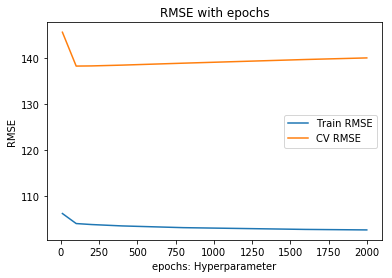

+--------+--------------------+
| Epochs |    Train Error     |
+--------+--------------------+
|   10   | 106.20683644358837 |
|  100   | 104.02617516542051 |
|  200   | 103.81135349757012 |
|  400   | 103.5095189883325  |
|  800   | 103.13302646141719 |
|  1600  | 102.74786672101149 |
|  2000  | 102.64013759310986 |
+--------+--------------------+
+--------+--------------------+
| Epochs |      CV Error      |
+--------+--------------------+
|   10   | 145.66856607428664 |
|  100   | 138.3035083221082  |
|  200   | 138.33738449577888 |
|  400   | 138.51191132989536 |
|  800   | 138.93536042423696 |
|  1600  | 139.73515184974315 |
|  2000  | 140.0802993300994  |
+--------+--------------------+
Best No.of Epochs is: 100
+--------+-------------------+
| Epochs |     Test Error    |
+--------+-------------------+
|  100   | 97.87845258759566 |
+--------+-------------------+


C:\Users\Kalyan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


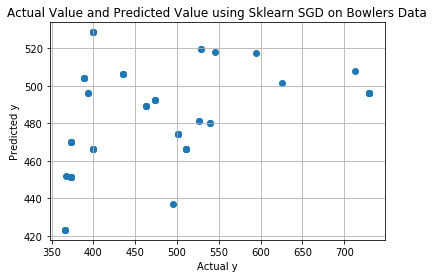

In [ ]:
epochs=[10,100,200,400,800,1600,2000]
best_epoch_cv_SGD_sklearn_Bowl=sklearnSGDRegressor(Xtrn_Bowl,ytrn_Bowl,Xcv_Bowl,ycv_Bowl,epochs)

rmse_test_SGD_Bowl=[]
SGDReg_sklearn_test_table_Bowl=PrettyTable()
SGDReg_sklearn_test_table_Bowl.field_names = ["Epochs","Test Error"]

sgd_reg_test_Bowl = SGDRegressor(shuffle = False,max_iter = best_epoch_cv_SGD_sklearn_Bowl)
sgd_reg_test_Bowl.fit(Xtrn_Bowl, ytrn_Bowl)
y_pred_tst_sgd_sklearn_Bowl = sgd_reg_test_Bowl.predict(Xtst_Bowl)
rmse_test_SGD_Bowl.append(math.sqrt(mean_squared_error(ytst_Bowl,y_pred_tst_sgd_sklearn_Bowl)))
SGDReg_sklearn_test_table_Bowl.add_row([best_epoch_cv_SGD_sklearn_Bowl,math.sqrt(mean_squared_error(ytst_Bowl,y_pred_tst_sgd_sklearn_Bowl))])
print(SGDReg_sklearn_test_table_Bowl)

plt.scatter(ytst_Bowl,y_pred_tst_sgd_sklearn_Bowl)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual Value and Predicted Value using Sklearn SGD on Bowlers Data')
plt.show()

### SGD Own

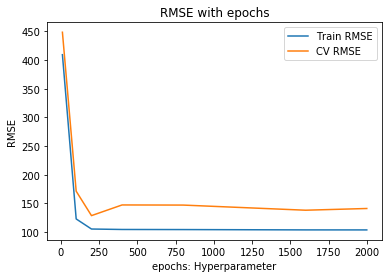

+--------+--------------------+
| Epochs |    Train Error     |
+--------+--------------------+
|   10   | 409.47499510991275 |
|  100   | 122.98562430534258 |
|  200   | 105.40096387474964 |
|  400   | 104.60794966059879 |
|  800   | 104.44626170673247 |
|  1600  | 103.88777540785044 |
|  2000  | 103.84365772381335 |
+--------+--------------------+
+--------+--------------------+
| Epochs |      CV Error      |
+--------+--------------------+
|   10   | 448.6304556719735  |
|  100   | 171.35743777189697 |
|  200   | 128.76442034290088 |
|  400   | 147.39269516962173 |
|  800   | 147.1598655238906  |
|  1600  | 138.20771494683325 |
|  2000  | 141.20497953885382 |
+--------+--------------------+
Best No.of Epochs is: 200
+--------+-------------------+
| Epochs |     Test Error    |
+--------+-------------------+
|  200   | 99.96147643854613 |
+--------+-------------------+


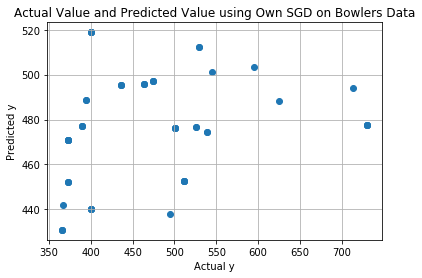

In [ ]:
train_data_Bowl=pd.DataFrame(Xtrn_Bowl)
train_data_Bowl['regresult']=ytrn_Bowl
epochs=[10,100,200,400,800,1600,2000]

rmse_test_SGD_Own_Bowl=[]
SGDReg_own_test_table_Bowl=PrettyTable()
SGDReg_own_test_table_Bowl.field_names = ["Epochs","Test Error"]

best_epoch_cv_SGD_Own_Bowl=SGDRegressionOwnTraining(Xtrn_Bowl,ytrn_Bowl,Xcv_Bowl,ycv_Bowl,epochs)

w_Bowl,b_Bowl = SGDRegressionOwn(train_data_Bowl,learning_rate=0.01,total_iter=best_epoch_cv_SGD_Own_Bowl,k=10)
y_pred_tst_sgd_own_Bowl = predictSGDOwn(Xtst_Bowl,w_Bowl,b_Bowl)
rmse_test_SGD_Own_Bowl.append(math.sqrt(mean_squared_error(ytst_Bowl,y_pred_tst_sgd_own_Bowl)))
SGDReg_own_test_table_Bowl.add_row([best_epoch_cv_SGD_Own_Bowl,math.sqrt(mean_squared_error(ytst_Bowl,y_pred_tst_sgd_own_Bowl))])
print(SGDReg_own_test_table_Bowl)

plt.scatter(ytst_Bowl,y_pred_tst_sgd_own_Bowl)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual Value and Predicted Value using Own SGD on Bowlers Data')
plt.show()

### LSE Own

RMSE using Least Squares Estimates is 98.3094397459801


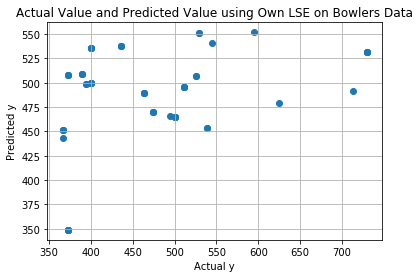

In [ ]:
shape=Xtrn_Bowl.shape[1]+1
we_Bowl=LinearRegressionLSM(Xtrn_Bowl,ytrn_Bowl,shape)
y_pred_lse_own_Bowl=predict_LSM(Xtst_Bowl,we_Bowl)
rmse_train_LSE_Own_Bowl=math.sqrt(mean_squared_error(ytst_Bowl,y_pred_lse_own_Bowl))
print("RMSE using Least Squares Estimates is",rmse_train_LSE_Own_Bowl)

plt.scatter(ytst_Bowl,y_pred_lse_own_Bowl)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual Value and Predicted Value using Own LSE on Bowlers Data')
plt.show()

### KNN Sklearn

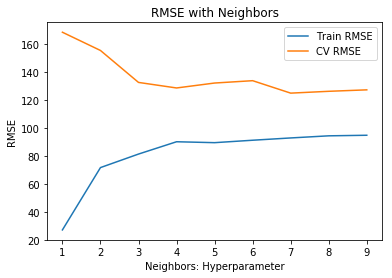

+-----------+-------------------+
| Neighbors |    Train Error    |
+-----------+-------------------+
|     1     | 27.06142111605584 |
|     2     | 71.69037324065634 |
|     3     | 81.37459546028347 |
|     4     | 90.18865110678581 |
|     5     | 89.53197681161112 |
|     6     | 91.27368170239421 |
|     7     | 92.91399780986171 |
|     8     | 94.43013756958239 |
|     9     | 94.83764721302165 |
+-----------+-------------------+
+-----------+--------------------+
| Neighbors |      CV Error      |
+-----------+--------------------+
|     1     | 168.59319875566354 |
|     2     | 155.54125926368647 |
|     3     | 132.6651777321994  |
|     4     | 128.69648294426005 |
|     5     | 132.23129567373812 |
|     6     | 133.90883899315173 |
|     7     | 124.99819499830573 |
|     8     | 126.30753639431022 |
|     9     | 127.34816667528258 |
+-----------+--------------------+
Best No.of Neighbors is: 7
+-----------+--------------------+
| Neighbors |     Test Error     |
+-----

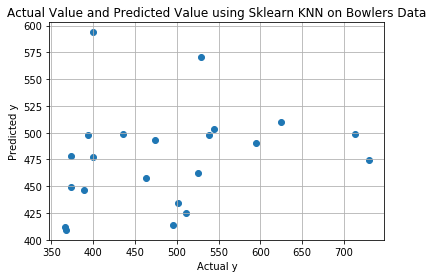

In [ ]:
rmse_test_KNN_Bowl=[]
KNNReg_sklearn_test_table_Bowl=PrettyTable()
KNNReg_sklearn_test_table_Bowl.field_names = ["Neighbors","Test Error"]
neighbors=[1,2,3,4,5,6,7,8,9]
best_neighbors_cv_KNN_sklearn_Bowl=sklearnKNNRegressor(Xtrn_Bowl_KNN,ytrn_Bowl_KNN,Xcv_Bowl_KNN,ycv_Bowl_KNN,neighbors)

knn_reg_test_Bowl = KNeighborsRegressor(n_neighbors=best_neighbors_cv_KNN_sklearn_Bowl)
knn_reg_test_Bowl.fit(Xtrn_Bowl_KNN, ytrn_Bowl_KNN)
y_pred_tst_knn_sklearn_Bowl = knn_reg_test_Bowl.predict(Xtst_Bowl_KNN)
rmse_test_KNN_Bowl.append(math.sqrt(mean_squared_error(ytst_Bowl_KNN,y_pred_tst_knn_sklearn_Bowl)))
KNNReg_sklearn_test_table_Bowl.add_row([best_neighbors_cv_KNN_sklearn_Bowl,math.sqrt(mean_squared_error(ytst_Bowl_KNN,y_pred_tst_knn_sklearn_Bowl))])
print(KNNReg_sklearn_test_table_Bowl)

plt.scatter(ytst_Bowl_KNN,y_pred_tst_knn_sklearn_Bowl)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual Value and Predicted Value using Sklearn KNN on Bowlers Data')
plt.show()

### KNN Own

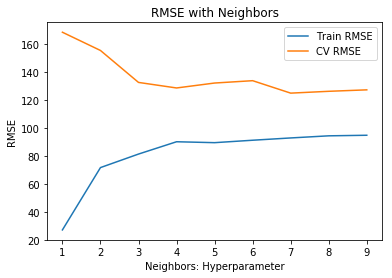

+-----------+-------------------+
| Neighbors |    Train Error    |
+-----------+-------------------+
|     1     | 27.06142111605584 |
|     2     | 71.69037324065634 |
|     3     | 81.37459546028347 |
|     4     | 90.18865110678581 |
|     5     | 89.53197681161112 |
|     6     | 91.27368170239421 |
|     7     | 92.91399780986171 |
|     8     | 94.43013756958239 |
|     9     | 94.83764721302165 |
+-----------+-------------------+
+-----------+--------------------+
| Neighbors |      CV Error      |
+-----------+--------------------+
|     1     | 168.59319875566354 |
|     2     | 155.54125926368647 |
|     3     | 132.6651777321994  |
|     4     | 128.69648294426005 |
|     5     | 132.23129567373812 |
|     6     | 133.90883899315173 |
|     7     | 124.99819499830573 |
|     8     | 126.30753639431022 |
|     9     | 127.34816667528258 |
+-----------+--------------------+
Best No.of Neighbors is: 7
+-----------+--------------------+
| Neighbors |     Test Error     |
+-----

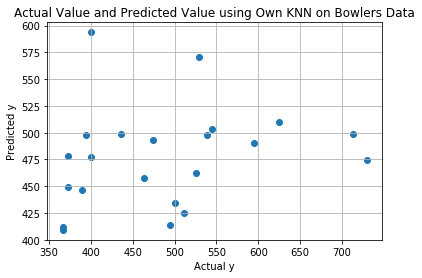

In [ ]:
neighbors=[1,2,3,4,5,6,7,8,9]
best_neighbors_cv_KNN_own_Bowl=KNNRegressorOwnTraining(Xtrn_Bowl_KNN,ytrn_Bowl_KNN,Xcv_Bowl_KNN,ycv_Bowl_KNN,neighbors)

y_pred_knn_own_Bowl=KNNRegressionOwn(Xtrn_Bowl_KNN,ytrn_Bowl_KNN,best_neighbors_cv_KNN_own_Bowl,Xtst_Bowl_KNN)
KNNReg_own_test_table_Bowl=PrettyTable()
KNNReg_own_test_table_Bowl.field_names = ["Neighbors","Test Error"]
KNNReg_own_test_table_Bowl.add_row([best_neighbors_cv_KNN_own_Bowl,math.sqrt(mean_squared_error(ytst_Bowl_KNN,y_pred_knn_own_Bowl))])
print(KNNReg_own_test_table_Bowl)
plt.scatter(ytst_Bowl_KNN,y_pred_knn_own_Bowl)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual Value and Predicted Value using Own KNN on Bowlers Data')
plt.show()

### Weighted KNN Own

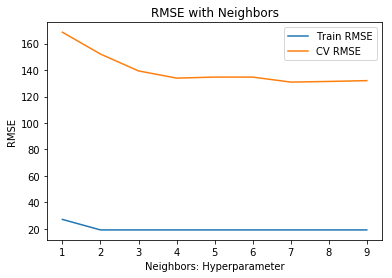

+-----------+--------------------+
| Neighbors |    Train Error     |
+-----------+--------------------+
|     1     | 27.06142111605584  |
|     2     | 19.135314620157402 |
|     3     | 19.135314660114567 |
|     4     | 19.135314703882344 |
|     5     | 19.13531474150093  |
|     6     | 19.13531478400213  |
|     7     | 19.13531481369367  |
|     8     | 19.135314841384826 |
|     9     | 19.135314860371462 |
+-----------+--------------------+
+-----------+--------------------+
| Neighbors |      CV Error      |
+-----------+--------------------+
|     1     | 168.59319875566354 |
|     2     | 152.10643890116424 |
|     3     | 139.3570218860494  |
|     4     | 133.91192298314215 |
|     5     | 134.68251390091243 |
|     6     | 134.6752860863784  |
|     7     | 130.89901937535555 |
|     8     | 131.39287846533054 |
|     9     | 132.00700664337418 |
+-----------+--------------------+
Best No.of Neighbors is: 7
+-----------+--------------------+
| Neighbors |     Test Error

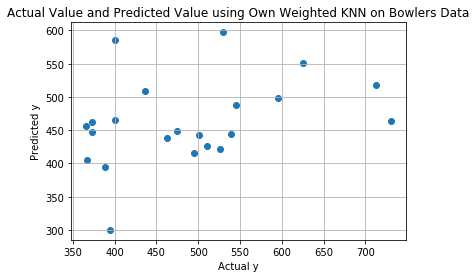

In [ ]:
neighbors=[1,2,3,4,5,6,7,8,9]
KNNReg_own_weighted_test_table_Bowl=PrettyTable()
KNNReg_own_weighted_test_table_Bowl.field_names = ["Neighbors","Test Error"]

best_neighbors_cv_KNN_Weighted_own_Bowl=KNNRegressionOwnWeightedTraining(Xtrn_Bowl_KNN,ytrn_Bowl_KNN,Xcv_Bowl_KNN,ycv_Bowl_KNN,neighbors)

y_pred_knn_own_weighted_Bowl=KNNRegressionOwnWeighted(Xtrn_Bowl_KNN,ytrn_Bowl_KNN,best_neighbors_cv_KNN_Weighted_own_Bowl,Xtst_Bowl_KNN)
KNNReg_own_weighted_test_table_Bowl.add_row([best_neighbors_cv_KNN_Weighted_own_Bowl,math.sqrt(mean_squared_error(ytst_Bowl_KNN,y_pred_knn_own_weighted_Bowl))])
print(KNNReg_own_weighted_test_table_Bowl)

plt.scatter(ytst_Bowl_KNN,y_pred_knn_own_weighted_Bowl)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual Value and Predicted Value using Own Weighted KNN on Bowlers Data')
plt.show()

### AllRounder Data

In [ ]:
M_trn = np.genfromtxt('./AllRounder_Data_After_Processing.csv', missing_values=0, skip_header=1, delimiter=',', dtype=float)
ytrn_All = M_trn[:, 0]
Xtrn_All = M_trn[:, 1:13]

Xtrn_All, Xtst_All, ytrn_All, ytst_All = train_test_split(Xtrn_All, ytrn_All, test_size=0.2)
Xtrn_All, Xcv_All, ytrn_All, ycv_All = train_test_split(Xtrn_All, ytrn_All, test_size=0.1) 

print("Shape of Xtrn_All is",Xtrn_All.shape)
print("Shape of ytrn_All is",ytrn_All.shape)
print("Shape of Xcv_All is",Xcv_All.shape)
print("Shape of ycv_All is",ycv_All.shape)
print("Shape of Xtst_All is",Xtst_All.shape)
print("Shape of ytst_All is",ytst_All.shape)

#Using the Data without sampling for KNN as KNN is sensitive to duplicates

Xtrn_All_KNN=Xtrn_All
Xcv_All_KNN=Xcv_All
Xtst_All_KNN=Xtst_All
ytrn_All_KNN=ytrn_All
ycv_All_KNN=ycv_All
ytst_All_KNN=ytst_All

Shape of Xtrn_All is (72, 12)
Shape of ytrn_All is (72,)
Shape of Xcv_All is (8, 12)
Shape of ycv_All is (8,)
Shape of Xtst_All is (20, 12)
Shape of ytst_All is (20,)


### Sampling the Train Data separately to make sure that there is no data leake to the Test set with Replacement to generate samples as the datasize is small.

In [ ]:
Xtrndf=pd.DataFrame(Xtrn_All)
ytrndf=pd.DataFrame(ytrn_All)
Train_Data = pd.concat([ytrndf,Xtrndf], axis=1)
Train_Data_upsampled = resample(Train_Data,replace=True,n_samples=50)
Xtrn_All_upsampled=Train_Data_upsampled.iloc[:,1:13].values
Ytrn_All_upsampled=Train_Data_upsampled.iloc[:,0].values
Xtrnfinal=np.concatenate((Xtrn_All, Xtrn_All_upsampled), axis=0)
ytrnfinal=np.concatenate((ytrn_All, Ytrn_All_upsampled), axis=0)

### Sampling the CV Data

In [ ]:
Xcvdf=pd.DataFrame(Xcv_All)
ycvdf=pd.DataFrame(ycv_All)
CV_Data = pd.concat([ycvdf,Xcvdf], axis=1)
CV_Data_upsampled = resample(CV_Data,replace=True,n_samples=30)
Xcv_All_upsampled=CV_Data_upsampled.iloc[:,1:13].values
Ycv_All_upsampled=CV_Data_upsampled.iloc[:,0].values
Xcvfinal=np.concatenate((Xcv_All, Xcv_All_upsampled), axis=0)
ycvfinal=np.concatenate((ycv_All, Ycv_All_upsampled), axis=0)

### Sampling the Test Data

In [ ]:
Xtestdf=pd.DataFrame(Xtst_All)
ytestdf=pd.DataFrame(ytst_All)
Test_Data = pd.concat([ytestdf,Xtestdf], axis=1)
Test_Data_upsampled = resample(Test_Data,replace=True,n_samples=15)
Xtest_All_upsampled=Test_Data_upsampled.iloc[:,1:13].values
Ytest_All_upsampled=Test_Data_upsampled.iloc[:,0].values
Xtestfinal=np.concatenate((Xtst_All, Xtest_All_upsampled), axis=0)
ytestfinal=np.concatenate((ytst_All, Ytest_All_upsampled), axis=0)

### Applying the Log to the Data to make it as normal distribution and then standardizing it

In [ ]:
Xtrn_All=Xtrnfinal
Xcv_All=Xcvfinal
Xtst_All=Xtestfinal
ytrn_All=ytrnfinal
ycv_All=ycvfinal
ytst_All=ytestfinal

print("Shape of Xtrn_All after upsampling is",Xtrn_All.shape)
print("Shape of ytrn_All after upsampling is",ytrn_All.shape)
print("Shape of Xcv_All after upsampling is",Xcv_All.shape)
print("Shape of ycv_All after upsampling is",ycv_All.shape)
print("Shape of Xtst_All after upsampling is",Xtst_All.shape)
print("Shape of ytst_All after upsampling is",ytst_All.shape)


Xtrn_All = np.log(Xtrn_All)
Xcv_All = np.log(Xcv_All)
Xtst_All = np.log(Xtst_All)

Stdscaler_All = preprocessing.StandardScaler().fit(Xtrn_All)
Xtrn_All = Stdscaler_All.transform(Xtrn_All)
Xcv_All = Stdscaler_All.transform(Xcv_All)
Xtst_All = Stdscaler_All.transform(Xtst_All)

Shape of Xtrn_All after upsampling is (122, 12)
Shape of ytrn_All after upsampling is (122,)
Shape of Xcv_All after upsampling is (38, 12)
Shape of ycv_All after upsampling is (38,)
Shape of Xtst_All after upsampling is (35, 12)
Shape of ytst_All after upsampling is (35,)


### SGD SKlearn

C:\Users\Kalyan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Kalyan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Kalyan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Kalyan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Kalyan\Anaconda3\lib\site-p

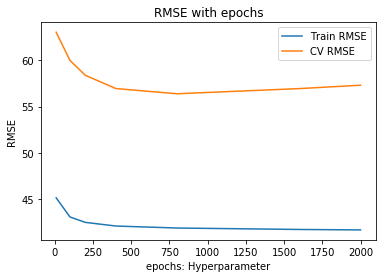

+--------+--------------------+
| Epochs |    Train Error     |
+--------+--------------------+
|   10   | 45.130376231385014 |
|  100   | 43.05760938909394  |
|  200   | 42.47368457470476  |
|  400   |  42.0774681522014  |
|  800   | 41.861634855038005 |
|  1600  | 41.70491110226381  |
|  2000  |  41.6564969910735  |
+--------+--------------------+
+--------+--------------------+
| Epochs |      CV Error      |
+--------+--------------------+
|   10   | 63.03648731537768  |
|  100   | 59.99379869889626  |
|  200   | 58.38799936216861  |
|  400   | 56.94827705368825  |
|  800   | 56.382189219844925 |
|  1600  | 56.94117325048967  |
|  2000  |  57.308000230274   |
+--------+--------------------+
Best No.of Epochs is: 800
+--------+--------------------+
| Epochs |     Test Error     |
+--------+--------------------+
|  800   | 52.956417551841525 |
+--------+--------------------+


C:\Users\Kalyan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


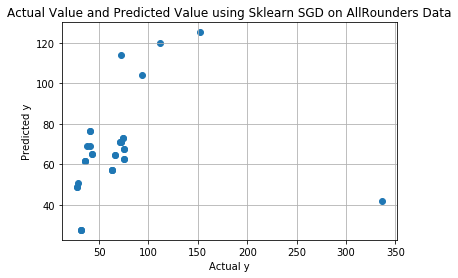

In [ ]:
epochs=[10,100,200,400,800,1600,2000]
best_epoch_cv_SGD_sklearn_All=sklearnSGDRegressor(Xtrn_All,ytrn_All,Xcv_All,ycv_All,epochs)

rmse_test_SGD_All=[]
SGDReg_sklearn_test_table_All=PrettyTable()
SGDReg_sklearn_test_table_All.field_names = ["Epochs","Test Error"]

sgd_reg_test_All = SGDRegressor(shuffle = False,max_iter = best_epoch_cv_SGD_sklearn_Bowl)
sgd_reg_test_All.fit(Xtrn_All, ytrn_All)
y_pred_tst_sgd_sklearn_All = sgd_reg_test_All.predict(Xtst_All)
rmse_test_SGD_All.append(math.sqrt(mean_squared_error(ytst_All,y_pred_tst_sgd_sklearn_All)))
SGDReg_sklearn_test_table_All.add_row([best_epoch_cv_SGD_sklearn_All,math.sqrt(mean_squared_error(ytst_All,y_pred_tst_sgd_sklearn_All))])
print(SGDReg_sklearn_test_table_All)

plt.scatter(ytst_All,y_pred_tst_sgd_sklearn_All)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual Value and Predicted Value using Sklearn SGD on AllRounders Data')
plt.show()

### SGD Own

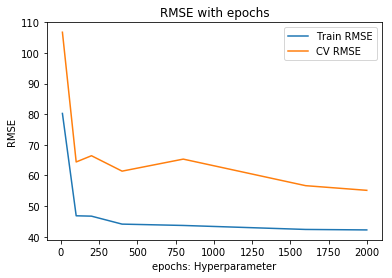

+--------+--------------------+
| Epochs |    Train Error     |
+--------+--------------------+
|   10   | 80.26618360602971  |
|  100   |  46.8372201415197  |
|  200   | 46.71640027308112  |
|  400   | 44.11642771302572  |
|  800   | 43.679792308797616 |
|  1600  |  42.375658818614   |
|  2000  | 42.22139978242118  |
+--------+--------------------+
+--------+--------------------+
| Epochs |      CV Error      |
+--------+--------------------+
|   10   | 106.79004670353771 |
|  100   | 64.42104171757784  |
|  200   | 66.45248641135728  |
|  400   | 61.41909188364906  |
|  800   | 65.34845706052704  |
|  1600  | 56.67606348839526  |
|  2000  |  55.1513821466075  |
+--------+--------------------+
Best No.of Epochs is: 2000
+--------+-------------------+
| Epochs |     Test Error    |
+--------+-------------------+
|  2000  | 51.14022020899138 |
+--------+-------------------+


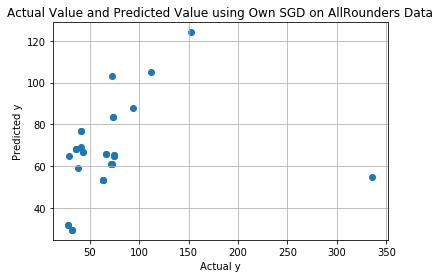

In [ ]:
train_data_All=pd.DataFrame(Xtrn_All)
train_data_All['regresult']=ytrn_All
epochs=[10,100,200,400,800,1600,2000]

rmse_test_SGD_Own_All=[]
SGDReg_own_test_table_All=PrettyTable()
SGDReg_own_test_table_All.field_names = ["Epochs","Test Error"]

best_epoch_cv_SGD_Own_All=SGDRegressionOwnTraining(Xtrn_All,ytrn_All,Xcv_All,ycv_All,epochs)

w_All,b_All = SGDRegressionOwn(train_data_All,learning_rate=0.01,total_iter=best_epoch_cv_SGD_Own_All,k=10)
y_pred_tst_sgd_own_All = predictSGDOwn(Xtst_All,w_All,b_All)
rmse_test_SGD_Own_All.append(math.sqrt(mean_squared_error(ytst_All,y_pred_tst_sgd_own_All)))
SGDReg_own_test_table_All.add_row([best_epoch_cv_SGD_Own_All,math.sqrt(mean_squared_error(ytst_All,y_pred_tst_sgd_own_All))])
print(SGDReg_own_test_table_All)

plt.scatter(ytst_All,y_pred_tst_sgd_own_All)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual Value and Predicted Value using Own SGD on AllRounders Data')
plt.show()

### LSE Own

RMSE using Least Squares Estimates is 58.744494933346196


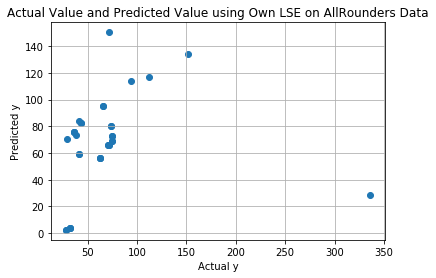

In [ ]:
shape=Xtrn_All.shape[1]+1
we_All=LinearRegressionLSM(Xtrn_All,ytrn_All,shape)
y_pred_lse_own_All=predict_LSM(Xtst_All,we_All)
rmse_train_LSE_Own_All=math.sqrt(mean_squared_error(ytst_All,y_pred_lse_own_All))
print("RMSE using Least Squares Estimates is",rmse_train_LSE_Own_All)

plt.scatter(ytst_All,y_pred_lse_own_All)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual Value and Predicted Value using Own LSE on AllRounders Data')
plt.show()

### KNN Sklearn

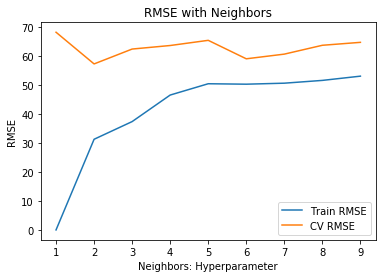

+-----------+--------------------+
| Neighbors |    Train Error     |
+-----------+--------------------+
|     1     |        0.0         |
|     2     | 31.262164299143887 |
|     3     | 37.35913873356264  |
|     4     | 46.51170327634397  |
|     5     | 50.40889471776451  |
|     6     | 50.255615895264334 |
|     7     | 50.601215333203996 |
|     8     | 51.562388467892845 |
|     9     | 53.025485952453344 |
+-----------+--------------------+
+-----------+--------------------+
| Neighbors |      CV Error      |
+-----------+--------------------+
|     1     | 68.16890786861705  |
|     2     | 57.243449406897206 |
|     3     | 62.37287070513911  |
|     4     | 63.59343519578102  |
|     5     |  65.3787809614098  |
|     6     | 59.01156313243476  |
|     7     | 60.623082759500996 |
|     8     |  63.6732841101745  |
|     9     | 64.68562389180153  |
+-----------+--------------------+
Best No.of Neighbors is: 2
+-----------+-------------------+
| Neighbors |     Test Error 

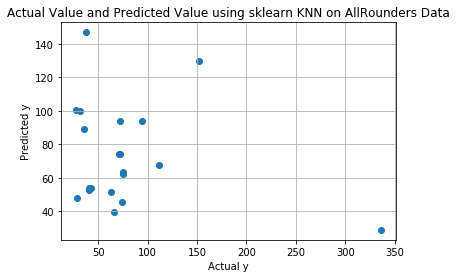

In [ ]:
rmse_test_KNN_All=[]
KNNReg_sklearn_test_table_All=PrettyTable()
KNNReg_sklearn_test_table_All.field_names = ["Neighbors","Test Error"]
neighbors=[1,2,3,4,5,6,7,8,9]
best_neighbors_cv_KNN_sklearn_All=sklearnKNNRegressor(Xtrn_All_KNN,ytrn_All_KNN,Xcv_All_KNN,ycv_All_KNN,neighbors)

knn_reg_test_All = KNeighborsRegressor(n_neighbors=best_neighbors_cv_KNN_sklearn_All)
knn_reg_test_All.fit(Xtrn_All_KNN, ytrn_All_KNN)
y_pred_tst_knn_sklearn_All = knn_reg_test_All.predict(Xtst_All_KNN)
rmse_test_KNN_All.append(math.sqrt(mean_squared_error(ytst_All_KNN,y_pred_tst_knn_sklearn_All)))
KNNReg_sklearn_test_table_All.add_row([best_neighbors_cv_KNN_sklearn_All,math.sqrt(mean_squared_error(ytst_All_KNN,y_pred_tst_knn_sklearn_All))])
print(KNNReg_sklearn_test_table_All)

plt.scatter(ytst_All_KNN,y_pred_tst_knn_sklearn_All)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual Value and Predicted Value using sklearn KNN on AllRounders Data')
plt.show()

### KNN Own

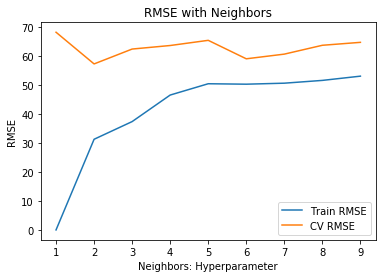

+-----------+--------------------+
| Neighbors |    Train Error     |
+-----------+--------------------+
|     1     |        0.0         |
|     2     | 31.262164299143887 |
|     3     | 37.35913873356264  |
|     4     | 46.51170327634397  |
|     5     | 50.40889471776451  |
|     6     | 50.255615895264334 |
|     7     | 50.601215333203996 |
|     8     | 51.562388467892845 |
|     9     | 53.025485952453344 |
+-----------+--------------------+
+-----------+--------------------+
| Neighbors |      CV Error      |
+-----------+--------------------+
|     1     | 68.16890786861705  |
|     2     | 57.243449406897206 |
|     3     | 62.37287070513911  |
|     4     | 63.59343519578102  |
|     5     |  65.3787809614098  |
|     6     | 59.01156313243476  |
|     7     | 60.623082759500996 |
|     8     |  63.6732841101745  |
|     9     | 64.68562389180153  |
+-----------+--------------------+
Best No.of Neighbors is: 2
+-----------+-------------------+
| Neighbors |     Test Error 

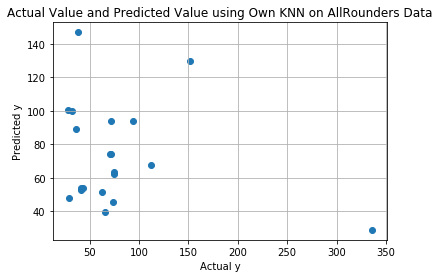

In [ ]:
neighbors=[1,2,3,4,5,6,7,8,9]
best_neighbors_cv_KNN_own_All=KNNRegressorOwnTraining(Xtrn_All_KNN,ytrn_All_KNN,Xcv_All_KNN,ycv_All_KNN,neighbors)

y_pred_knn_own_All=KNNRegressionOwn(Xtrn_All_KNN,ytrn_All_KNN,best_neighbors_cv_KNN_own_All,Xtst_All_KNN)
KNNReg_own_test_table_All=PrettyTable()
KNNReg_own_test_table_All.field_names = ["Neighbors","Test Error"]
KNNReg_own_test_table_All.add_row([best_neighbors_cv_KNN_own_All,math.sqrt(mean_squared_error(ytst_All_KNN,y_pred_knn_own_All))])

print(KNNReg_own_test_table_All)

plt.scatter(ytst_All_KNN,y_pred_knn_own_All)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual Value and Predicted Value using Own KNN on AllRounders Data')
plt.show()

### Weighted KNN Own

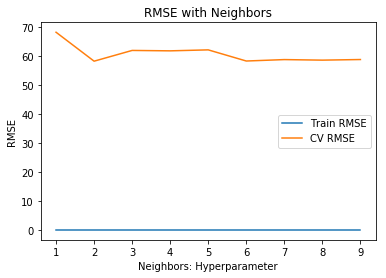

+-----------+------------------------+
| Neighbors |      Train Error       |
+-----------+------------------------+
|     1     |          0.0           |
|     2     | 1.0814765319822562e-05 |
|     3     | 1.314270285744526e-05  |
|     4     |  1.64165170546383e-05  |
|     5     | 1.8566148389759893e-05 |
|     6     | 2.0718246172761497e-05 |
|     7     |  2.20950752453253e-05  |
|     8     | 2.313233771725277e-05  |
|     9     | 2.4677276866382032e-05 |
+-----------+------------------------+
+-----------+--------------------+
| Neighbors |      CV Error      |
+-----------+--------------------+
|     1     | 68.16890786861705  |
|     2     | 58.191542985976824 |
|     3     | 61.89606050390543  |
|     4     | 61.753811146584354 |
|     5     | 62.09120738738993  |
|     6     | 58.24650626274695  |
|     7     | 58.737817258744506 |
|     8     | 58.54825783806649  |
|     9     | 58.75912010547479  |
+-----------+--------------------+
Best No.of Neighbors is: 2
+----------

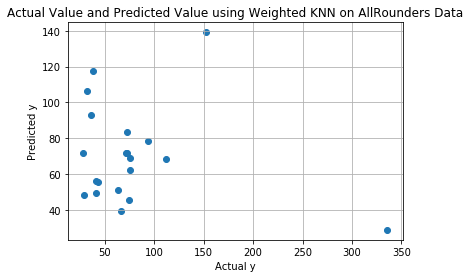

In [ ]:
neighbors=[1,2,3,4,5,6,7,8,9]
KNNReg_own_weighted_test_table_All=PrettyTable()
best_neighbors_cv_KNN_Weighted_own_All=KNNRegressionOwnWeightedTraining(Xtrn_All_KNN,ytrn_All_KNN,Xcv_All_KNN,ycv_All_KNN,neighbors)

y_pred_knn_own_weighted_All=KNNRegressionOwnWeighted(Xtrn_All_KNN,ytrn_All_KNN,best_neighbors_cv_KNN_Weighted_own_All,Xtst_All_KNN)

KNNReg_own_weighted_test_table_All.field_names = ["Neighbors","Test Error"]
KNNReg_own_weighted_test_table_All.add_row([best_neighbors_cv_KNN_own_All,math.sqrt(mean_squared_error(ytst_All_KNN,y_pred_knn_own_weighted_All))])
print(KNNReg_own_weighted_test_table_All)

plt.scatter(ytst_All_KNN,y_pred_knn_own_weighted_All)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual Value and Predicted Value using Weighted KNN on AllRounders Data')
plt.show()

### Algorithm for predicting IPL Winner

In [ ]:
from array import array

def logScale(x,Stdscaler):
    x_log=np.log(x)
    x_log_std=Stdscaler.transform(x_log)
    return x_log_std


def getOutput(player,cate,model):
    print(player)
    if cate == 'allrounder':
        allRound_stats=player[0:4]+player[6:14]
        allRound_stats_Arr=np.asarray(allRound_stats,dtype=float)
        allRound_stats_Arr=logScale(allRound_stats_Arr.reshape(1,-1),Stdscaler_All)
        #print("Stats is",allRound_stats_Arr)
        #print("Predicted value is",sgd_reg_test_All.predict(allRound_stats_Arr.reshape(1,-1)))
        return model.predict(allRound_stats_Arr)
    elif cate == 'bowler':
        bowler_stats=player[0:5]
        bowler_stats_Arr=np.asarray(bowler_stats,dtype=float)
        bowler_stats_Arr=logScale(bowler_stats_Arr.reshape(1,-1),Stdscaler_Bowl)
        return model.predict(bowler_stats_Arr)
    else:
        batsmen_stats=player[0:4]+player[6:9]
        batsmen_stats_Arr=np.asarray(batsmen_stats,dtype=float)
        batsmen_stats_Arr=logScale(batsmen_stats_Arr.reshape(1,-1),Stdscaler_Bat)
        return model.predict(batsmen_stats_Arr)

def appendOutput(output,team,cate,country,final):
    if team in final:
        pass
    else:
        final[team] = list()
    final[team].append(list([output, cate, country]))
    
def getBest11(tup):
    sorted(tup, key=lambda x: x[0],reverse=True)
    reqBat = 4
    reqWk = 1
    reqAll = 2
    reqBow = 4
    MaxFor = 4
    currFor = 0
    curr = 0
    maxPlayers = 11

    team = list()
    for item in tup:
        if curr == maxPlayers:
            break
        if item[2] == 'F' and currFor == MaxFor:
            continue
        if item[1] == 'batsmen':
            if reqBat == 0:
                continue
            reqBat = reqBat - 1 
            curr = curr + 1              
            team.append(item)
        elif item[1] == 'bowler':
            if reqBow == 0:
                continue
            reqBow = reqBow - 1
            curr = curr + 1
            team.append(item)
        elif item[1] == 'wicketkeeper':
            if reqWk == 0:
                if reqBat == 0:
                    continue
                else:
                    reqBat = reqBat - 1
            else:
                reqWk = reqWk - 1
            team.append(item)
            curr = curr + 1
        else:
            if reqAll == 0:
                continue
            else:
                reqAll = reqAll - 1
            team.append(item)
            curr = curr + 1
        if item[2] == 'F':
            currFor = currFor + 1
    return team



In [ ]:
from csv import reader
with open('ipl_Updated.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    rows = list(csv_reader)
data = {}
for row in rows:
    if row[0] in data:
        pass
    else:
        data[row[0]] = {}
    if row[2] in data[row[0]]:
        pass
    else:
        data[row[0]][row[2]] = dict()
    if row[20] in data[row[0]][row[2]]:
        pass
    else:
        data[row[0]][row[2]][row[20]] = list()
    data[row[0]][row[2]][row[20]].append(row)

final = {}

for team in data:
    for cate in data[team]:
        for country in data[team][cate]:
            for player in data[team][cate][country]:
                if cate == 'allrounder':
                    player = player[4:]
                    allRound_stats=player[0:4]+player[6:14]
                    allRound_stats_Arr=np.asarray(allRound_stats,dtype=float)
                    allRound_stats_Arr=logScale(allRound_stats_Arr.reshape(1,-1),Stdscaler_All)
                    output = predictSGDOwn(allRound_stats_Arr,w_All,b_All)
                    appendOutput(output[0], team, cate, country, final)
                elif cate == 'bowler':
                    player = player[4:]
                    bowler_stats=player[0:5]
                    bowler_stats_Arr=np.asarray(bowler_stats,dtype=float)
                    bowler_stats_Arr=logScale(bowler_stats_Arr.reshape(1,-1),Stdscaler_Bowl)
                    output = predictSGDOwn(bowler_stats_Arr,w_Bowl,b_Bowl)
                    appendOutput(output[0], team, cate, country, final)
                else:
                    player = player[4:]
                    batsmen_stats=player[0:4]+player[6:9]
                    batsmen_stats_Arr=np.asarray(batsmen_stats,dtype=float)
                    batsmen_stats_Arr=logScale(batsmen_stats_Arr.reshape(1,-1),Stdscaler_Bat)
                    output = predictSGDOwn(batsmen_stats_Arr,w_Bat,b_Bat)
                    appendOutput(output[0], team, cate, country, final)
                            

totalRating = dict()
for team in final:
    bTeam = getBest11(final[team])
    totalSum = 0
    for tup in bTeam:
        totalSum = totalSum + tup[0]
    totalRating[team] = totalSum 

print(totalRating)


#11
#5B,1WK,1AL,4B
#4F
#7





{'CSK': 5122.69296309085, 'DC': 5196.524130437427, 'KX1P': 4589.4830688264665, 'KKR': 2848.8926646115524, 'MI': 4999.64530097251, 'RR': 4726.176962185898, 'RCB': 5170.61669544239, 'SRH': 5187.9250688788925}


In [ ]:
homeFactor = 1.05
homeDefactor = 0.95

home = dict({ 
    "CSK":"Chennai",
    "RR":"Rajastan",
    "DC":"Delhi",
    "SRH":"Hyderabad",
    "MI":"Mumbai",
    "KKR":"Kolkata",
    "RCB":"Bengaluru",
    "KX1P":"Punjab",
})

def pwinner(team1, team2, considerHF):
    if considerHF:
        if homeFactor*totalRating[team1] >= homeDefactor*totalRating[team2]:
            return team1
        else:
            return team2
    if totalRating[team1] >= totalRating[team2]:
        return team1
    else:
        return team2

import random
list_of_teams = list({"CSK", "MI", "RR", "KKR", "DC", "RCB", "SRH", "KX1P"})
matches = set()
totalLeagueMatches = 56
i=1

pointsTable = {}
for t in list_of_teams:
    pointsTable[t] = 0
while i <= totalLeagueMatches:
    curr = random.sample(list_of_teams, 2)
    if curr[0]+curr[1] in matches:
        continue
    matches.add(curr[0]+curr[1])
    venue = curr[0]
    winner = pwinner(curr[0], curr[1], True)
    pointsTable[winner] = pointsTable[winner] + 2
    print(curr[0]+"  vs  " +curr[1] + "   ||    venue at " + venue)
    print("Winner is "+ winner +"\n")
    i=i+1
import operator
pointsTable = sorted(pointsTable.items(), key=operator.itemgetter(1), reverse=True)

print("Qualifier1:")
print(pointsTable[0][0]+"  vs  " +pointsTable[1][0])
qual1=pwinner(pointsTable[0][0],pointsTable[1][0],False)
qual1L=pointsTable[1][0] if(qual1==pointsTable[0][0]) else pointsTable[0][0]
print("Winner is " + qual1+"\n")

print("Eliminator:")
print(pointsTable[2][0] + "  vs  "+pointsTable[3][0])
elemW = pwinner(pointsTable[2][0],pointsTable[3][0],False)
print("Winner is " + elemW+"\n")


print("Qualifier2:")
print(qual1L+"  vs  " +elemW)
qual2=pwinner(qual1L,elemW,False)
print("Winner is " + qual2+"\n")

print("******FINAL******")
print(qual1+"  vs  " +qual2)
finalWinner = pwinner(qual1, qual2, False)
print("Winner is " + finalWinner+"\n")

print(finalWinner)

MI  vs  KX1P   ||    venue at MI
Winner is MI

CSK  vs  SRH   ||    venue at CSK
Winner is CSK

RR  vs  KKR   ||    venue at RR
Winner is RR

MI  vs  CSK   ||    venue at MI
Winner is MI

RCB  vs  SRH   ||    venue at RCB
Winner is RCB

KX1P  vs  RR   ||    venue at KX1P
Winner is KX1P

DC  vs  RR   ||    venue at DC
Winner is DC

CSK  vs  RR   ||    venue at CSK
Winner is CSK

SRH  vs  KX1P   ||    venue at SRH
Winner is SRH

KKR  vs  DC   ||    venue at KKR
Winner is DC

DC  vs  SRH   ||    venue at DC
Winner is DC

CSK  vs  MI   ||    venue at CSK
Winner is CSK

CSK  vs  DC   ||    venue at CSK
Winner is CSK

MI  vs  SRH   ||    venue at MI
Winner is MI

KX1P  vs  MI   ||    venue at KX1P
Winner is KX1P

KX1P  vs  DC   ||    venue at KX1P
Winner is DC

CSK  vs  KKR   ||    venue at CSK
Winner is CSK

MI  vs  RR   ||    venue at MI
Winner is MI

DC  vs  RCB   ||    venue at DC
Winner is DC

KKR  vs  SRH   ||    venue at KKR
Winner is SRH

RR  vs  RCB   ||    venue at RR
Winner is RR


In [ ]:
final = {}

for team in data:
    for cate in data[team]:
        for country in data[team][cate]:
            for player in data[team][cate][country]:
                if cate == 'allrounder':
                    player = player[4:]
                    allRound_stats=player[0:4]+player[6:14]
                    allRound_stats_Arr=np.asarray(allRound_stats,dtype=float)
                    allRound_stats_Arr=logScale(allRound_stats_Arr.reshape(1,-1),Stdscaler_All)
                    output = KNNRegressionOwn(Xtrn_All,ytrn_All,best_neighbors_cv_KNN_own_All,allRound_stats_Arr)
                    appendOutput(output[0], team, cate, country, final)
                elif cate == 'bowler':
                    player = player[4:]
                    bowler_stats=player[0:5]
                    bowler_stats_Arr=np.asarray(bowler_stats,dtype=float)
                    bowler_stats_Arr=logScale(bowler_stats_Arr.reshape(1,-1),Stdscaler_Bowl)
                    output = KNNRegressionOwn(Xtrn_Bowl,ytrn_Bowl,best_neighbors_cv_KNN_own_Bowl,bowler_stats_Arr)
                    appendOutput(output[0], team, cate, country, final)
                else:
                    player = player[4:]
                    batsmen_stats=player[0:4]+player[6:9]
                    batsmen_stats_Arr=np.asarray(batsmen_stats,dtype=float)
                    batsmen_stats_Arr=logScale(batsmen_stats_Arr.reshape(1,-1),Stdscaler_Bat)
                    output = KNNRegressionOwn(Xtrn_Bat,ytrn_Bat,best_neighbors_cv_KNN_own_Bat,batsmen_stats_Arr)
                    appendOutput(output[0], team, cate, country, final)
                            

totalRating = dict()
for team in final:
    bTeam = getBest11(final[team])
    totalSum = 0
    for tup in bTeam:
        totalSum = totalSum + tup[0]
    totalRating[team] = totalSum 

print(totalRating)


{'CSK': 5152.75, 'DC': 5039.053571428572, 'KX1P': 4329.660714285714, 'KKR': 4141.142857142857, 'MI': 5057.625, 'RR': 4682.857142857142, 'RCB': 4799.517857142857, 'SRH': 4685.571428571428}


In [ ]:
pointsTable = {}
for t in list_of_teams:
    pointsTable[t] = 0
i=1
matches = set()

while i <= totalLeagueMatches:
    curr = random.sample(list_of_teams, 2)
    if curr[0]+curr[1] in matches:
        continue
    matches.add(curr[0]+curr[1])
    venue = curr[0]
    winner = pwinner(curr[0], curr[1], True)
    pointsTable[winner] = pointsTable[winner] + 2
    print(curr[0]+"  vs  " +curr[1] + "   ||    venue at " + venue)
    print("Winner is "+ winner +"\n")
    i=i+1
import operator
pointsTable = sorted(pointsTable.items(), key=operator.itemgetter(1), reverse=True)

print("Qualifier1:")
print(pointsTable[0][0]+"  vs  " +pointsTable[1][0])
qual1=pwinner(pointsTable[0][0],pointsTable[1][0],False)
qual1L=pointsTable[1][0] if(qual1==pointsTable[0][0]) else pointsTable[0][0]
print("Winner is " + qual1+"\n")

print("Eliminator:")
print(pointsTable[2][0] + "  vs  "+pointsTable[3][0])
elemW = pwinner(pointsTable[2][0],pointsTable[3][0],False)
print("Winner is " + elemW+"\n")


print("Qualifier2:")
print(qual1L+"  vs  " +elemW)
qual2=pwinner(qual1L,elemW,False)
print("Winner is " + qual2+"\n")

print("******FINAL******")
print(qual1+"  vs  " +qual2)
finalWinner = pwinner(qual1, qual2, False)
print("Winner is " + finalWinner+"\n")

print(finalWinner)

# **References**
[[1]Predict IPL Winner with Machine Learning](https://thecleverprogrammer.com/2020/09/22/predict-ipl-winner-with-machine-learning/)